## 1. Importación de Librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from scipy import stats
import math
import random

# Para modelos con scikit-learn (solo para modelos 2-5)
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Configuración de visualizaciones
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 2. Carga del Dataset

In [3]:
# Cargar archivo local
filename = r'dataset_24_mushroom.arff'

print("=" * 80)
print("CARGANDO DATOS DEL DATASET DE HONGOS")
print("=" * 80)

data, meta = arff.loadarff(filename)
df = pd.DataFrame(data)

# Decodificar bytes a strings
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')

print(f"\n✓ Dimensiones del dataset: {df.shape}")
print(f"✓ Número de muestras: {df.shape[0]:,}")
print(f"✓ Número de características: {df.shape[1] - 1}")
print(f"\nPrimeras 5 filas del dataset:")
df.head()

CARGANDO DATOS DEL DATASET DE HONGOS

✓ Dimensiones del dataset: (8124, 23)
✓ Número de muestras: 8,124
✓ Número de características: 22

Primeras 5 filas del dataset:

✓ Dimensiones del dataset: (8124, 23)
✓ Número de muestras: 8,124
✓ Número de características: 22

Primeras 5 filas del dataset:


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


## 3. Preprocesamiento de Datos

In [4]:
print("=" * 80)
print("PREPROCESAMIENTO DE DATOS")
print("=" * 80)

# Separar características y variable objetivo
X = df.drop('class', axis=1)
y = df['class']

# Tratar valores faltantes como categoría adicional
X = X.replace('?', 'missing')
print("✓ Valores faltantes tratados como categoría 'missing'")

# Label Encoding para todas las características categóricas
le_dict = {}
X_encoded = X.copy()

for col in X.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    le_dict[col] = le

print(f"✓ {len(le_dict)} características codificadas con Label Encoding")

# Codificar variable objetivo (e=0: comestible, p=1: venenoso)
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

print(f"\nClases codificadas:")
for i, clase in enumerate(le_y.classes_):
    nombre = 'Comestible' if clase == 'e' else 'Venenoso'
    print(f"  {clase} ({nombre}) → {i}")

print(f"\nDimensiones de X codificado: {X_encoded.shape}")
print(f"Dimensiones de y codificado: {y_encoded.shape}")

PREPROCESAMIENTO DE DATOS
✓ Valores faltantes tratados como categoría 'missing'
✓ 22 características codificadas con Label Encoding

Clases codificadas:
  e (Comestible) → 0
  p (Venenoso) → 1

Dimensiones de X codificado: (8124, 22)
Dimensiones de y codificado: (8124,)


## 4. División de Datos

Dividimos los datos en tres conjuntos:
- **Entrenamiento (70%):** Para entrenar los modelos
- **Prueba (30%):** Para evaluación final

Para el Modelo 1 (Regresión Logística manual) usaremos esta división.
Para los Modelos 2-5 agregaremos validación cruzada.

In [5]:
print("=" * 80)
print("DIVISIÓN DE DATOS")
print("=" * 80)

# Fijar semilla para reproducibilidad
random.seed(42)
np.random.seed(42)

N = X_encoded.shape[0]
indices = np.random.permutation(N)

# 70% entrenamiento, 30% prueba
train_size = int(math.ceil(0.7 * N))

Xtrain = X_encoded.values[indices[0:train_size], :]
Xtest = X_encoded.values[indices[train_size:N], :]
Ytrain = y_encoded[indices[0:train_size]].reshape(-1, 1)
Ytest = y_encoded[indices[train_size:N]].reshape(-1, 1)

print(f"\nConjunto de entrenamiento: {Xtrain.shape[0]:,} muestras ({Xtrain.shape[0]/N*100:.1f}%)")
print(f"Conjunto de prueba: {Xtest.shape[0]:,} muestras ({Xtest.shape[0]/N*100:.1f}%)")

# Normalizar datos
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

print("\n✓ Datos normalizados con StandardScaler (media=0, std=1)")
print("✓ Scaler ajustado SOLO en conjunto de entrenamiento")

DIVISIÓN DE DATOS

Conjunto de entrenamiento: 5,687 muestras (70.0%)
Conjunto de prueba: 2,437 muestras (30.0%)

✓ Datos normalizados con StandardScaler (media=0, std=1)
✓ Scaler ajustado SOLO en conjunto de entrenamiento


---

# MODELO 1: REGRESIÓN LOGÍSTICA (IMPLEMENTACIÓN MANUAL)

## Fundamentos Teóricos

La regresión logística es un modelo **paramétrico** para clasificación binaria que utiliza la función sigmoide:

### 1. Función Sigmoide (Activación)

$$g(z) = \frac{1}{1 + e^{-z}}$$

Donde $z = \mathbf{w}^T \mathbf{x}$ es la combinación lineal de características.

### 2. Modelo de Regresión Logística

$$h_{\mathbf{w}}(\mathbf{x}) = g(\mathbf{w}^T \mathbf{x}) = \frac{1}{1 + e^{-\mathbf{w}^T \mathbf{x}}}$$

### 3. Función de Costo (Entropía Cruzada)

$$J(\mathbf{w}) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(h_{\mathbf{w}}(\mathbf{x}_i)) + (1-y_i) \log(1 - h_{\mathbf{w}}(\mathbf{x}_i)) \right]$$

### 4. Gradiente Descendente

Regla de actualización de parámetros:

$$\mathbf{w}_j := \mathbf{w}_j - \eta \frac{\partial J(\mathbf{w})}{\partial \mathbf{w}_j}$$

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}_j} = \frac{1}{N} \sum_{i=1}^{N} \left( h_{\mathbf{w}}(\mathbf{x}_i) - y_i \right) x_{ij}$$

## 5.1. Implementación de Funciones Base

In [30]:
def sigmoidal(z):
    """Función de activación Sigmoidal
    
    z: variable a la que se le aplica la función sigmoide (array numpy)
    retorna: vector con el valor de la función sigmoide aplicada a cada elemento
    """
    s = 1 / (1 + np.exp(-z))
    return s


def extension_matriz(X):
    """Extiende la matriz X añadiendo una columna de unos (para el término de sesgo)
    
    X: matriz con el conjunto de muestras [muestras x características]
    retorna: X_ext, matriz extendida con un vector de unos [muestras x (características+1)]
    """
    muestras, caracteristicas = X.shape
    unos = np.ones((muestras, 1))
    X_ext = np.concatenate((unos, X), axis=1)
    return X_ext


def logistic_regression(X, W):
    """Calcula la salida de la regresión logística
    
    X: valores de características [N x d] (extendida)
    W: pesos del modelo [d x 1]
    retorna: probabilidad estimada por regresión logística
    """
    # Producto matricial X·W
    z = np.dot(X, W)
    # Aplicar función sigmoide
    Y_est = sigmoidal(z)
    return Y_est


def cost_logistic(Y_est, Y):
    """Calcula la función de costo (entropía cruzada)
    
    Y_est: valores estimados por el modelo [N x 1]
    Y: valores reales de las etiquetas [N x 1]
    retorna: valor del costo (float)
    """
    Y_est = Y_est.reshape(-1, 1)
    Y = Y.reshape(-1, 1)
    
    # Evitar log(0) añadiendo epsilon
    eps = np.finfo(np.float32).eps
    
    # Costo de entropía cruzada
    f1 = Y * np.log(Y_est + eps)
    f2 = (1 - Y) * np.log(1 - Y_est + eps)
    costo = -np.sum(f1 + f2) / Y.shape[0]
    
    return costo


print("✓ Funciones base implementadas:")
print("  - sigmoidal()")
print("  - extension_matriz()")
print("  - logistic_regression()")
print("  - cost_logistic()")

✓ Funciones base implementadas:
  - sigmoidal()
  - extension_matriz()
  - logistic_regression()
  - cost_logistic()


## 5.2. Implementación del Gradiente Descendente

In [31]:
def gradiente_descendente_logistic(X, Y, eta, iteraciones):
    """Gradiente descendente para regresión logística
    
    X: Matriz de datos [N x d] (sin extender)
    Y: Vector con etiquetas [N x 1]
    eta: Tasa de aprendizaje (learning rate)
    iteraciones: número máximo de iteraciones
    
    retorna: 
        W: parámetros optimizados [d+1 x 1]
        costos: historial de costos por iteración
    """
    # Extender matriz (añadir columna de unos)
    X_ext = extension_matriz(X)
    
    # Número de características (incluyendo sesgo)
    d = X_ext.shape[1]
    # Número de muestras
    N = X_ext.shape[0]
    
    # Inicializar pesos en ceros
    W = np.zeros((d, 1))
    
    # Historial de costos
    costos = np.zeros(iteraciones)
    
    # Gradiente descendente
    for iter in range(iteraciones):
        # Calcular predicción con pesos actuales
        Y_est = logistic_regression(X_ext, W)
        
        # Calcular costo actual
        costo = cost_logistic(Y_est, Y)
        costos[iter] = costo
        
        # Calcular gradiente
        # ∇J(w) = (1/N) * X^T * (Y_est - Y)
        gradiente = np.dot(X_ext.T, (Y_est - Y)) / N
        
        # Actualizar pesos
        # w := w - η * ∇J(w)
        W = W - eta * gradiente
    
    print(f"Costo inicial: {costos[0]:.4f}")
    print(f"Costo final (iteración {iteraciones}): {costos[-1]:.4f}")
    print(f"Reducción del costo: {(costos[0] - costos[-1]):.4f}")
    
    return W, costos


print("✓ Función gradiente_descendente_logistic() implementada")

✓ Función gradiente_descendente_logistic() implementada


## 5.3. Función de Evaluación del Modelo

In [32]:
def evaluar_modelo(W, X, Y_true):
    """Evalúa el modelo de regresión logística
    
    W: parámetros del modelo entrenado [d x 1]
    X: conjunto de datos para evaluación [N x d] (sin extender)
    Y_true: valores reales de las etiquetas [N x 1]
    
    retorna: 
        error_clasificacion: proporción de errores
        Y_pred: predicciones binarias (0 o 1)
    """
    # Extender matriz
    X_ext = extension_matriz(X)
    
    # Obtener probabilidades
    Y_prob = logistic_regression(X_ext, W)
    
    # Convertir probabilidades a clases (umbral = 0.5)
    Y_pred = (Y_prob >= 0.5).astype(int)
    
    # Calcular error de clasificación
    errores = np.sum(Y_pred != Y_true)
    error_clasificacion = errores / Y_true.shape[0]
    
    return error_clasificacion, Y_pred


def metricas_clasificacion(Y_true, Y_pred):
    """Calcula métricas de clasificación
    
    Y_true: etiquetas reales [N x 1]
    Y_pred: etiquetas predichas [N x 1]
    
    retorna: diccionario con métricas
    """
    Y_true = Y_true.flatten()
    Y_pred = Y_pred.flatten()
    
    # Matriz de confusión
    tn = np.sum((Y_true == 0) & (Y_pred == 0))
    tp = np.sum((Y_true == 1) & (Y_pred == 1))
    fn = np.sum((Y_true == 1) & (Y_pred == 0))
    fp = np.sum((Y_true == 0) & (Y_pred == 1))
    
    # Calcular métricas
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion_Matrix': np.array([[tn, fp], [fn, tp]])
    }


print("✓ Funciones de evaluación implementadas:")
print("  - evaluar_modelo()")
print("  - metricas_clasificacion()")

✓ Funciones de evaluación implementadas:
  - evaluar_modelo()
  - metricas_clasificacion()


## 5.4. Entrenamiento del Modelo 1: Regresión Logística

Vamos a entrenar nuestro modelo con diferentes tasas de aprendizaje para encontrar la mejor configuración.

In [33]:
print("=" * 80)
print("ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (MANUAL)")
print("=" * 80)

# Parámetros de entrenamiento
iteraciones = 100
eta = 0.1  # Tasa de aprendizaje

print(f"\nParámetros de entrenamiento:")
print(f"  - Iteraciones: {iteraciones}")
print(f"  - Tasa de aprendizaje (η): {eta}")
print(f"  - Número de muestras de entrenamiento: {Xtrain.shape[0]:,}")
print(f"  - Número de características: {Xtrain.shape[1]}")

print(f"\n🔍 Entrenando modelo...\n")

# Entrenar modelo
W_logistic, costos_logistic = gradiente_descendente_logistic(
    Xtrain, Ytrain, eta=eta, iteraciones=iteraciones
)

print(f"\n✓ Modelo entrenado exitosamente")
print(f"Dimensiones de W: {W_logistic.shape}")

ENTRENAMIENTO - MODELO 1: REGRESIÓN LOGÍSTICA (MANUAL)

Parámetros de entrenamiento:
  - Iteraciones: 100
  - Tasa de aprendizaje (η): 0.1
  - Número de muestras de entrenamiento: 5,687
  - Número de características: 22

🔍 Entrenando modelo...

Costo inicial: 0.6931
Costo final (iteración 100): 0.2475
Reducción del costo: 0.4456

✓ Modelo entrenado exitosamente
Dimensiones de W: (23, 1)


## 5.5. Visualización del Entrenamiento

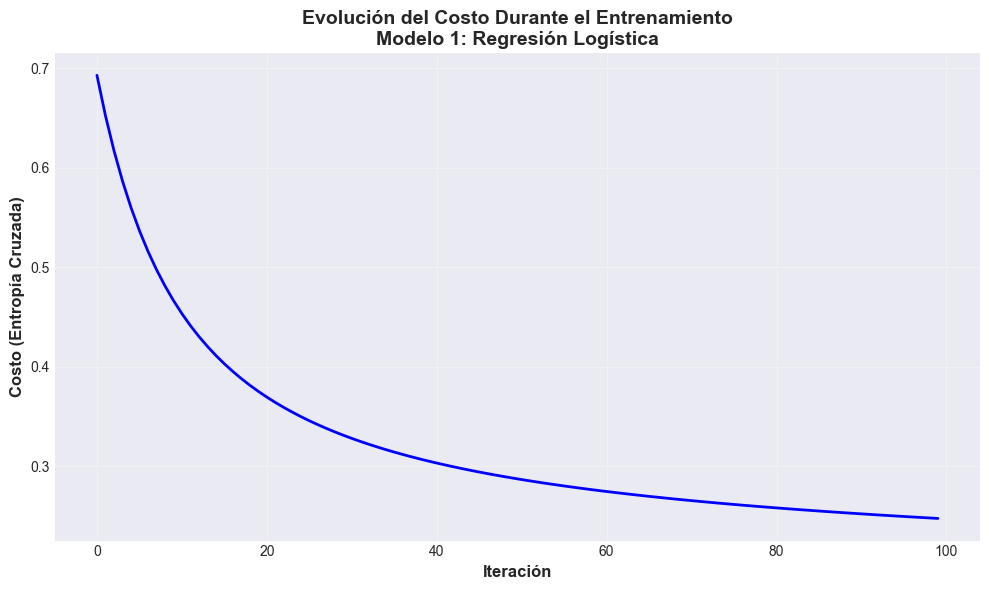


Interpretación:
✓ El modelo está convergiendo correctamente (el costo disminuye significativamente)


In [34]:
# Graficar evolución del costo durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(range(iteraciones), costos_logistic, linewidth=2, color='blue')
plt.xlabel('Iteración', fontsize=12, fontweight='bold')
plt.ylabel('Costo (Entropía Cruzada)', fontsize=12, fontweight='bold')
plt.title('Evolución del Costo Durante el Entrenamiento\nModelo 1: Regresión Logística', 
          fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInterpretación:")
if costos_logistic[-1] < costos_logistic[0] * 0.5:
    print("✓ El modelo está convergiendo correctamente (el costo disminuye significativamente)")
else:
    print("⚠️ El modelo podría necesitar más iteraciones o ajustar la tasa de aprendizaje")

## 5.6. Evaluación del Modelo 1

In [35]:
print("=" * 80)
print("EVALUACIÓN - MODELO 1: REGRESIÓN LOGÍSTICA")
print("=" * 80)

# Evaluar en conjunto de entrenamiento
print("\n📊 Evaluación en conjunto de ENTRENAMIENTO:")
error_train, Y_train_pred = evaluar_modelo(W_logistic, Xtrain, Ytrain)
metricas_train = metricas_clasificacion(Ytrain, Y_train_pred)

print(f"  Error de clasificación: {error_train:.4f} ({error_train*100:.2f}%)")
for metrica, valor in metricas_train.items():
    if metrica != 'Confusion_Matrix':
        print(f"  {metrica}: {valor:.4f}")

# Evaluar en conjunto de prueba
print("\n🎯 Evaluación en conjunto de PRUEBA:")
error_test, Y_test_pred = evaluar_modelo(W_logistic, Xtest, Ytest)
metricas_test = metricas_clasificacion(Ytest, Y_test_pred)

print(f"  Error de clasificación: {error_test:.4f} ({error_test*100:.2f}%)")
for metrica, valor in metricas_test.items():
    if metrica != 'Confusion_Matrix':
        print(f"  {metrica}: {valor:.4f}")

# Análisis de sobreajuste
print("\n" + "=" * 80)
print("ANÁLISIS DE SOBREAJUSTE")
print("=" * 80)

gap_accuracy = metricas_train['Accuracy'] - metricas_test['Accuracy']
print(f"\nDiferencia Train-Test (Accuracy): {gap_accuracy:.4f}")

if gap_accuracy < 0.02:
    print("✓ Excelente generalización (gap < 2%)")
elif gap_accuracy < 0.05:
    print("✓ Buena generalización (gap < 5%)")
else:
    print("⚠️ Posible sobreajuste (gap > 5%)")

EVALUACIÓN - MODELO 1: REGRESIÓN LOGÍSTICA

📊 Evaluación en conjunto de ENTRENAMIENTO:
  Error de clasificación: 0.0788 (7.88%)
  Accuracy: 0.9212
  Precision: 0.9485
  Recall: 0.8871
  F1-Score: 0.9168

🎯 Evaluación en conjunto de PRUEBA:
  Error de clasificación: 0.0845 (8.45%)
  Accuracy: 0.9155
  Precision: 0.9496
  Recall: 0.8642
  F1-Score: 0.9049

ANÁLISIS DE SOBREAJUSTE

Diferencia Train-Test (Accuracy): 0.0058
✓ Excelente generalización (gap < 2%)


## 5.7. Matriz de Confusión

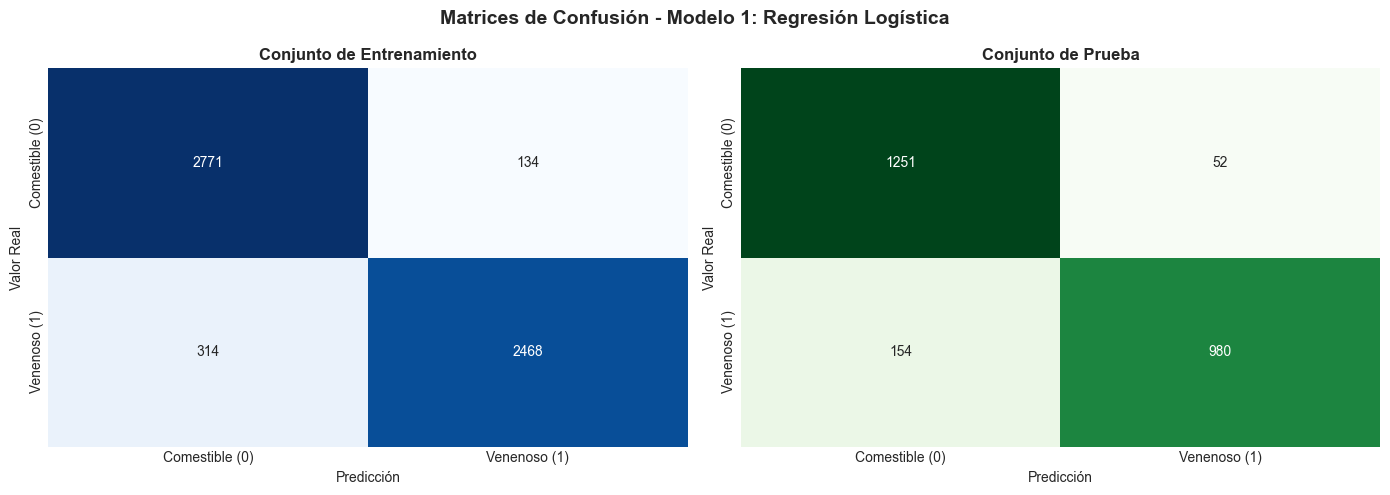


⚠️ ANÁLISIS CRÍTICO:
  Falsos Negativos (venenoso → comestible): 154 casos
  Falsos Positivos (comestible → venenoso): 52 casos

  💀 Los falsos negativos son CRÍTICOS (pueden ser fatales)
  ✓ Los falsos positivos solo causan desperdicio de hongos comestibles


In [36]:
# Visualizar matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Matrices de Confusión - Modelo 1: Regresión Logística', 
             fontsize=14, fontweight='bold')

# Matriz de confusión - Entrenamiento
sns.heatmap(metricas_train['Confusion_Matrix'], annot=True, fmt='d', cmap='Blues', 
            ax=axes[0], cbar=False,
            xticklabels=['Comestible (0)', 'Venenoso (1)'],
            yticklabels=['Comestible (0)', 'Venenoso (1)'])
axes[0].set_title('Conjunto de Entrenamiento', fontweight='bold')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Predicción')

# Matriz de confusión - Prueba
sns.heatmap(metricas_test['Confusion_Matrix'], annot=True, fmt='d', cmap='Greens', 
            ax=axes[1], cbar=False,
            xticklabels=['Comestible (0)', 'Venenoso (1)'],
            yticklabels=['Comestible (0)', 'Venenoso (1)'])
axes[1].set_title('Conjunto de Prueba', fontweight='bold')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Predicción')

plt.tight_layout()
plt.show()

# Análisis de la matriz de confusión
cm = metricas_test['Confusion_Matrix']
fn = cm[1, 0]  # Falsos Negativos (venenoso clasificado como comestible) - MUY PELIGROSO
fp = cm[0, 1]  # Falsos Positivos (comestible clasificado como venenoso) - Desperdicio

print("\n⚠️ ANÁLISIS CRÍTICO:")
print(f"  Falsos Negativos (venenoso → comestible): {fn} casos")
print(f"  Falsos Positivos (comestible → venenoso): {fp} casos")
print(f"\n  💀 Los falsos negativos son CRÍTICOS (pueden ser fatales)")
print(f"  ✓ Los falsos positivos solo causan desperdicio de hongos comestibles")

## 5.8. Visualización de la Clasificación

Vamos a visualizar cómo el modelo clasifica los datos usando diferentes representaciones:
1. **Datos originales** con etiquetas reales
2. **Predicciones del modelo** en conjunto de prueba
3. **Frontera de decisión** del modelo

In [37]:
# Para visualizar, necesitamos reducir dimensionalidad a 2D usando PCA
from sklearn.decomposition import PCA

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
Xtrain_2d = pca.fit_transform(Xtrain)
Xtest_2d = pca.transform(Xtest)

print("✓ Reducción dimensional aplicada (PCA)")
print(f"  Varianza explicada por las 2 componentes principales: {pca.explained_variance_ratio_.sum():.2%}")
print(f"  Componente 1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"  Componente 2: {pca.explained_variance_ratio_[1]:.2%}")

✓ Reducción dimensional aplicada (PCA)
  Varianza explicada por las 2 componentes principales: 32.81%
  Componente 1: 20.34%
  Componente 2: 12.47%


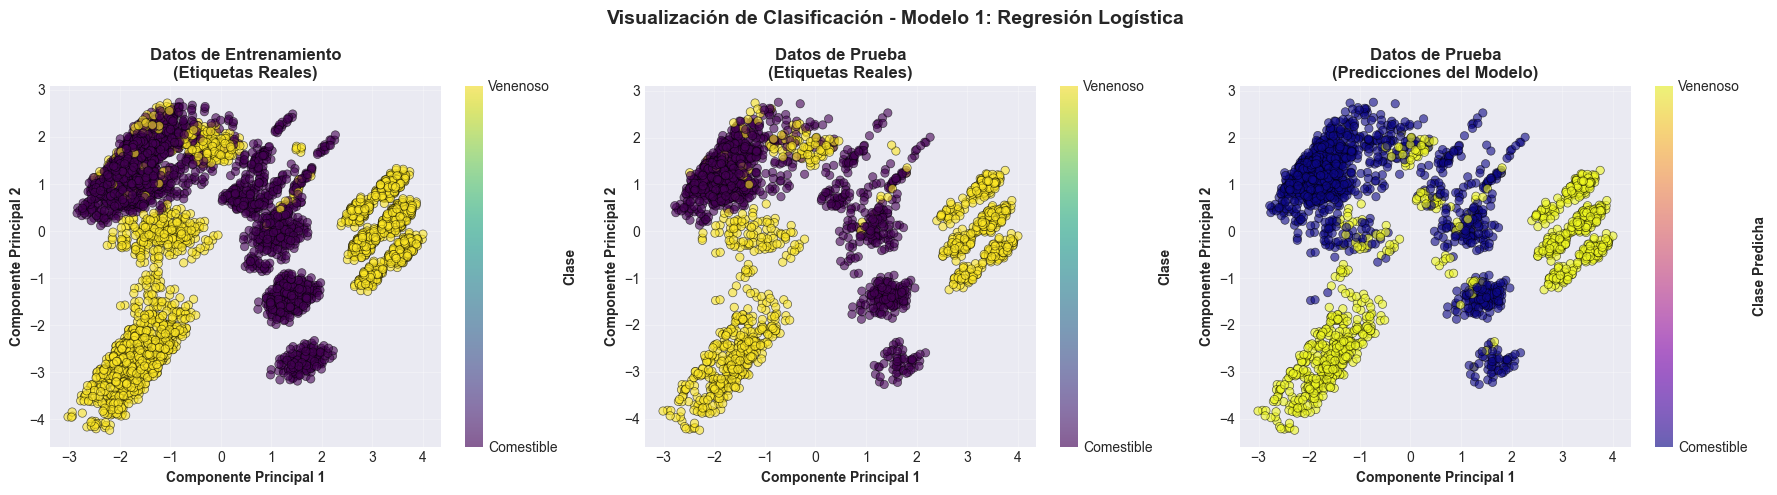


📊 Interpretación:
  • Izquierda: Distribución real de las clases en entrenamiento
  • Centro: Distribución real de las clases en prueba
  • Derecha: Cómo el modelo clasifica los datos de prueba
  • Los puntos mal clasificados son las diferencias entre centro y derecha


In [38]:
# Graficar datos ANTES de clasificar (etiquetas reales)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Visualización de Clasificación - Modelo 1: Regresión Logística', 
             fontsize=14, fontweight='bold')

# Gráfica 1: Datos de entrenamiento con etiquetas REALES
ax = axes[0]
scatter1 = ax.scatter(Xtrain_2d[:, 0], Xtrain_2d[:, 1], 
                     c=Ytrain.flatten(), cmap='viridis', 
                     alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Componente Principal 1', fontweight='bold')
ax.set_ylabel('Componente Principal 2', fontweight='bold')
ax.set_title('Datos de Entrenamiento\n(Etiquetas Reales)', fontweight='bold')
ax.grid(alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=ax)
cbar1.set_label('Clase', fontweight='bold')
cbar1.set_ticks([0, 1])
cbar1.set_ticklabels(['Comestible', 'Venenoso'])

# Gráfica 2: Datos de prueba con etiquetas REALES
ax = axes[1]
scatter2 = ax.scatter(Xtest_2d[:, 0], Xtest_2d[:, 1], 
                     c=Ytest.flatten(), cmap='viridis', 
                     alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Componente Principal 1', fontweight='bold')
ax.set_ylabel('Componente Principal 2', fontweight='bold')
ax.set_title('Datos de Prueba\n(Etiquetas Reales)', fontweight='bold')
ax.grid(alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=ax)
cbar2.set_label('Clase', fontweight='bold')
cbar2.set_ticks([0, 1])
cbar2.set_ticklabels(['Comestible', 'Venenoso'])

# Gráfica 3: Datos de prueba con PREDICCIONES del modelo
ax = axes[2]
scatter3 = ax.scatter(Xtest_2d[:, 0], Xtest_2d[:, 1], 
                     c=Y_test_pred.flatten(), cmap='plasma', 
                     alpha=0.6, edgecolors='k', linewidth=0.5)
ax.set_xlabel('Componente Principal 1', fontweight='bold')
ax.set_ylabel('Componente Principal 2', fontweight='bold')
ax.set_title('Datos de Prueba\n(Predicciones del Modelo)', fontweight='bold')
ax.grid(alpha=0.3)
cbar3 = plt.colorbar(scatter3, ax=ax)
cbar3.set_label('Clase Predicha', fontweight='bold')
cbar3.set_ticks([0, 1])
cbar3.set_ticklabels(['Comestible', 'Venenoso'])

plt.tight_layout()
plt.show()

print("\n📊 Interpretación:")
print("  • Izquierda: Distribución real de las clases en entrenamiento")
print("  • Centro: Distribución real de las clases en prueba")
print("  • Derecha: Cómo el modelo clasifica los datos de prueba")
print(f"  • Los puntos mal clasificados son las diferencias entre centro y derecha")

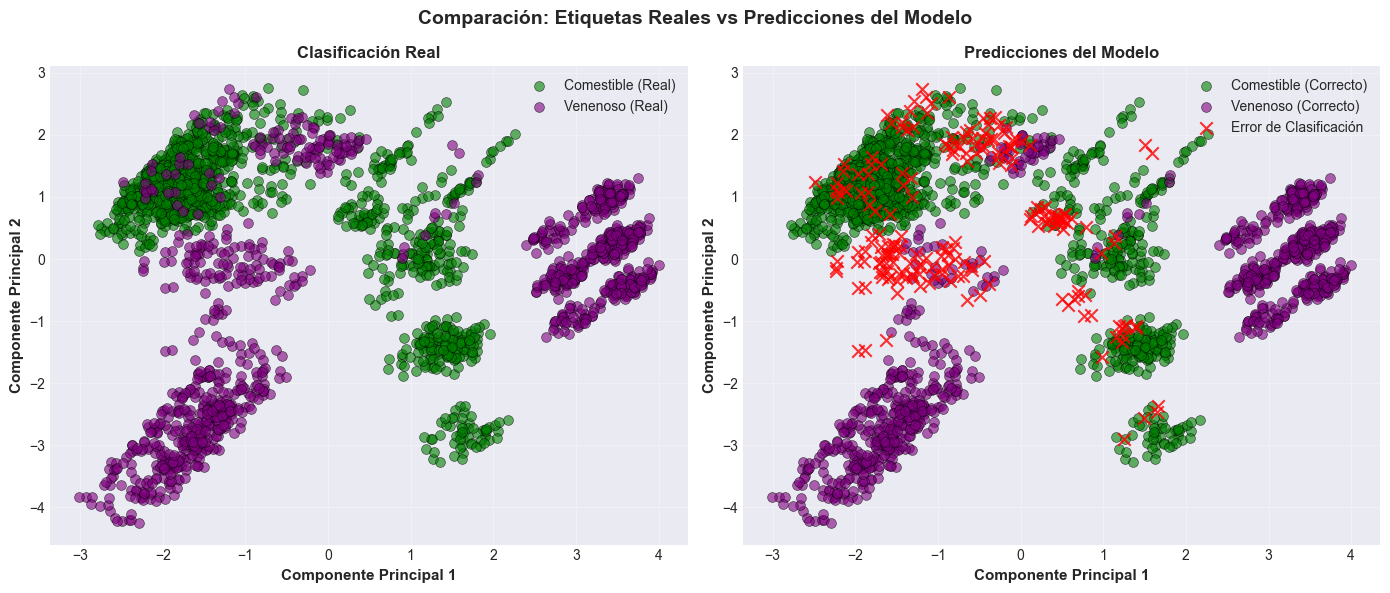


❌ Errores de clasificación visualizados: 206 de 2437 (8.45%)
✓ Clasificaciones correctas: 2231 de 2437 (91.55%)


In [39]:
# Visualización comparativa: Predicciones vs Realidad con línea de decisión teórica
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Comparación: Etiquetas Reales vs Predicciones del Modelo', 
             fontsize=14, fontweight='bold')

# Gráfica 1: Etiquetas REALES con línea de separación visual
ax = axes[0]
for clase, color, nombre in [(0, 'green', 'Comestible'), (1, 'purple', 'Venenoso')]:
    mask = Ytest.flatten() == clase
    ax.scatter(Xtest_2d[mask, 0], Xtest_2d[mask, 1], 
              c=color, label=f'{nombre} (Real)',
              alpha=0.6, edgecolors='k', linewidth=0.5, s=50)

ax.set_xlabel('Componente Principal 1', fontweight='bold', fontsize=11)
ax.set_ylabel('Componente Principal 2', fontweight='bold', fontsize=11)
ax.set_title('Clasificación Real', fontweight='bold', fontsize=12)
ax.legend(loc='upper right')
ax.grid(alpha=0.3)

# Gráfica 2: Predicciones con errores resaltados
ax = axes[1]
# Clasificaciones correctas
mask_correct = (Y_test_pred.flatten() == Ytest.flatten())
for clase, color, nombre in [(0, 'green', 'Comestible'), (1, 'purple', 'Venenoso')]:
    mask = (Y_test_pred.flatten() == clase) & mask_correct
    ax.scatter(Xtest_2d[mask, 0], Xtest_2d[mask, 1], 
              c=color, label=f'{nombre} (Correcto)',
              alpha=0.6, edgecolors='k', linewidth=0.5, s=50)

# Errores de clasificación (resaltados en rojo)
mask_error = ~mask_correct
if mask_error.sum() > 0:
    ax.scatter(Xtest_2d[mask_error, 0], Xtest_2d[mask_error, 1], 
              c='red', label='Error de Clasificación',
              alpha=0.8, edgecolors='black', linewidth=1.5, s=80, marker='x')

ax.set_xlabel('Componente Principal 1', fontweight='bold', fontsize=11)
ax.set_ylabel('Componente Principal 2', fontweight='bold', fontsize=11)
ax.set_title('Predicciones del Modelo', fontweight='bold', fontsize=12)
ax.legend(loc='upper right')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas de errores
print(f"\n❌ Errores de clasificación visualizados: {mask_error.sum()} de {len(Ytest)} ({mask_error.sum()/len(Ytest)*100:.2f}%)")
print(f"✓ Clasificaciones correctas: {mask_correct.sum()} de {len(Ytest)} ({mask_correct.sum()/len(Ytest)*100:.2f}%)")

Entrenando modelo en espacio 2D para visualizar frontera de decisión...
Costo inicial: 0.6931
Costo final (iteración 100): 0.5269
Reducción del costo: 0.1663


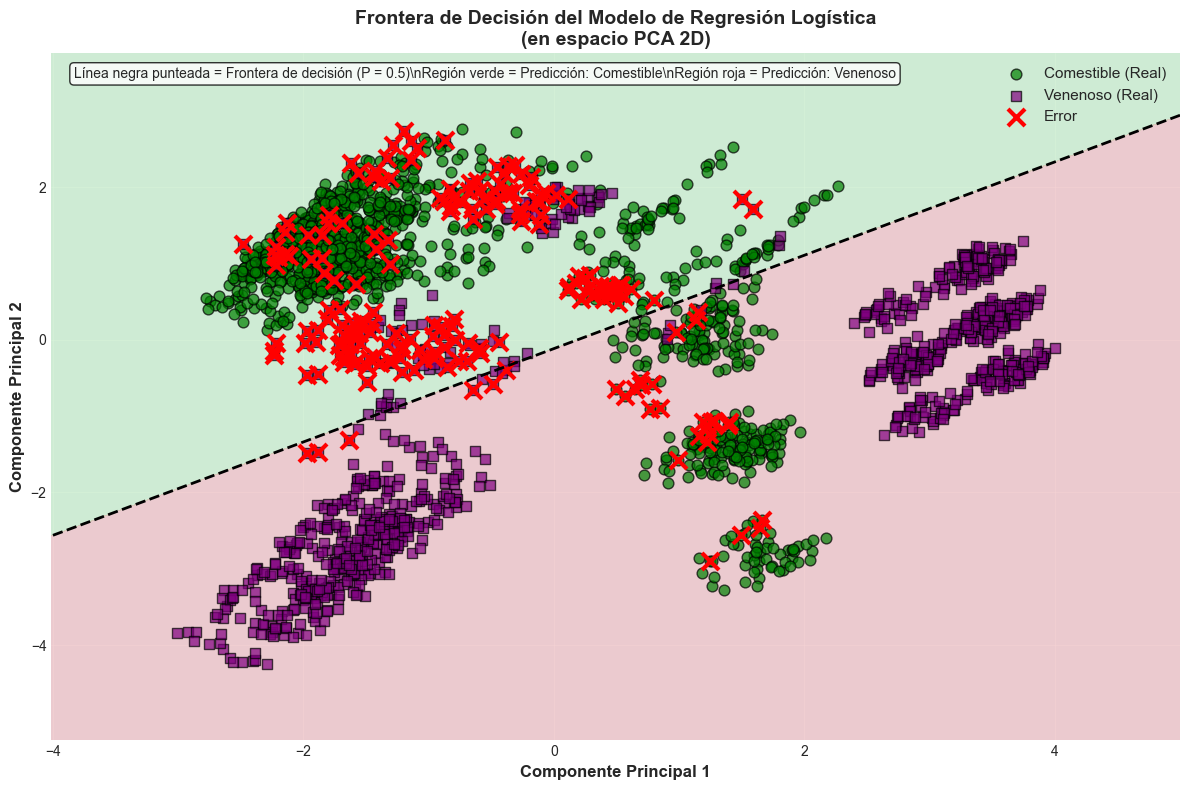


✓ Frontera de decisión visualizada en espacio 2D
  Nota: Esta es una aproximación en 2D del modelo real de 22 dimensiones


In [40]:
# Visualización con frontera de decisión aproximada
# Entrenar un modelo de regresión logística en el espacio 2D (PCA) para visualizar frontera

print("Entrenando modelo en espacio 2D para visualizar frontera de decisión...")

# Entrenar modelo en datos reducidos a 2D
W_2d, _ = gradiente_descendente_logistic(Xtrain_2d, Ytrain, eta=1.0, iteraciones=100)

# Crear malla para la frontera de decisión
x_min, x_max = Xtest_2d[:, 0].min() - 1, Xtest_2d[:, 0].max() + 1
y_min, y_max = Xtest_2d[:, 1].min() - 1, Xtest_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predecir para cada punto de la malla
Z = np.c_[xx.ravel(), yy.ravel()]
Z_ext = extension_matriz(Z)
Z_pred = logistic_regression(Z_ext, W_2d)
Z_pred = Z_pred.reshape(xx.shape)

# Crear la visualización
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Dibujar la frontera de decisión (contorno de probabilidad = 0.5)
contour = ax.contourf(xx, yy, Z_pred, levels=[0, 0.5, 1], 
                      colors=['lightgreen', 'lightcoral'], alpha=0.3)
ax.contour(xx, yy, Z_pred, levels=[0.5], colors='black', linewidths=2, linestyles='--')

# Dibujar los puntos de prueba
for clase, color, marker, nombre in [(0, 'green', 'o', 'Comestible'), 
                                      (1, 'purple', 's', 'Venenoso')]:
    mask = Ytest.flatten() == clase
    ax.scatter(Xtest_2d[mask, 0], Xtest_2d[mask, 1], 
              c=color, marker=marker, label=f'{nombre} (Real)',
              alpha=0.7, edgecolors='black', linewidth=1, s=60)

# Resaltar errores
mask_error = (Y_test_pred.flatten() != Ytest.flatten())
if mask_error.sum() > 0:
    ax.scatter(Xtest_2d[mask_error, 0], Xtest_2d[mask_error, 1], 
              c='red', marker='x', label='Error',
              alpha=1, s=150, linewidth=3)

ax.set_xlabel('Componente Principal 1', fontweight='bold', fontsize=12)
ax.set_ylabel('Componente Principal 2', fontweight='bold', fontsize=12)
ax.set_title('Frontera de Decisión del Modelo de Regresión Logística\n(en espacio PCA 2D)', 
            fontweight='bold', fontsize=14)
ax.legend(loc='best', fontsize=11)
ax.grid(alpha=0.3)

# Añadir anotación sobre la frontera
ax.text(0.02, 0.98, 
        f'Línea negra punteada = Frontera de decisión (P = 0.5)\\n'
        f'Región verde = Predicción: Comestible\\n'
        f'Región roja = Predicción: Venenoso',
        transform=ax.transAxes, fontsize=10,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

print(f"\n✓ Frontera de decisión visualizada en espacio 2D")
print(f"  Nota: Esta es una aproximación en 2D del modelo real de {Xtrain.shape[1]} dimensiones")

## 5.9. Visualización 3D de la Frontera de Decisión

Usaremos 3 componentes principales de PCA para crear una visualización 3D más informativa.

In [41]:
# Reducir a 3 dimensiones con PCA
pca_3d = PCA(n_components=3)
Xtrain_3d = pca_3d.fit_transform(Xtrain)
Xtest_3d = pca_3d.transform(Xtest)

print("✓ Reducción dimensional a 3D aplicada (PCA)")
print(f"  Varianza explicada por las 3 componentes principales: {pca_3d.explained_variance_ratio_.sum():.2%}")
print(f"  Componente 1: {pca_3d.explained_variance_ratio_[0]:.2%}")
print(f"  Componente 2: {pca_3d.explained_variance_ratio_[1]:.2%}")
print(f"  Componente 3: {pca_3d.explained_variance_ratio_[2]:.2%}")

# Entrenar modelo en espacio 3D
print("\n🔍 Entrenando modelo en espacio 3D para visualizar frontera...")
W_3d, _ = gradiente_descendente_logistic(Xtrain_3d, Ytrain, eta=1.0, iteraciones=100)

✓ Reducción dimensional a 3D aplicada (PCA)
  Varianza explicada por las 3 componentes principales: 43.83%
  Componente 1: 20.34%
  Componente 2: 12.47%
  Componente 3: 11.02%

🔍 Entrenando modelo en espacio 3D para visualizar frontera...
Costo inicial: 0.6931
Costo final (iteración 100): 0.4581
Reducción del costo: 0.2351


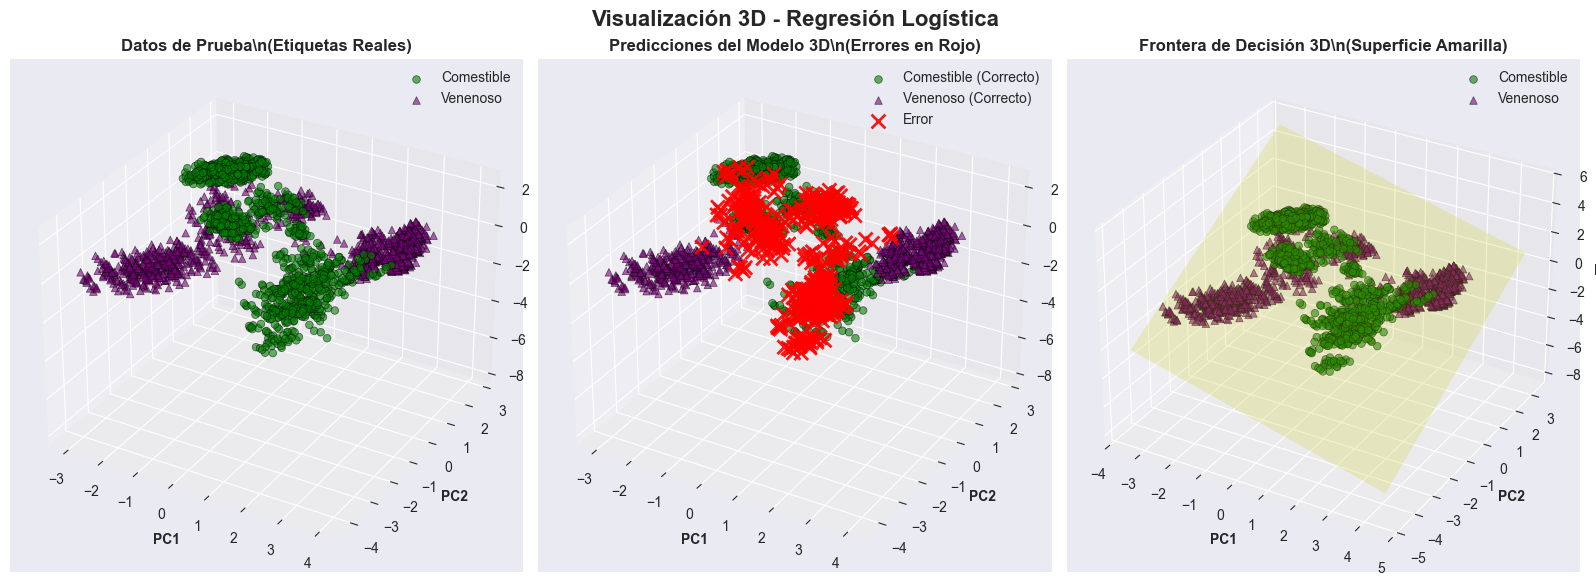


✓ Visualización 3D completada
  Errores en 3D: 435 de 2437 (17.85%)
  La superficie amarilla (panel derecho) representa la frontera de decisión


In [42]:
# Visualización 3D con matplotlib
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 6))

# Subplot 1: Datos de prueba con etiquetas reales
ax1 = fig.add_subplot(131, projection='3d')

for clase, color, marker, nombre in [(0, 'green', 'o', 'Comestible'), 
                                      (1, 'purple', '^', 'Venenoso')]:
    mask = Ytest.flatten() == clase
    ax1.scatter(Xtest_3d[mask, 0], Xtest_3d[mask, 1], Xtest_3d[mask, 2],
               c=color, marker=marker, label=nombre, alpha=0.6, s=30, edgecolors='k', linewidth=0.5)

ax1.set_xlabel('PC1', fontweight='bold')
ax1.set_ylabel('PC2', fontweight='bold')
ax1.set_zlabel('PC3', fontweight='bold')
ax1.set_title('Datos de Prueba\\n(Etiquetas Reales)', fontweight='bold')
ax1.legend(loc='upper right')
ax1.grid(alpha=0.3)

# Subplot 2: Predicciones con errores
ax2 = fig.add_subplot(132, projection='3d')

# Obtener predicciones en 3D
_, Y_test_pred_3d = evaluar_modelo(W_3d, Xtest_3d, Ytest)
mask_correct_3d = (Y_test_pred_3d.flatten() == Ytest.flatten())

for clase, color, marker, nombre in [(0, 'green', 'o', 'Comestible'), 
                                      (1, 'purple', '^', 'Venenoso')]:
    mask = (Y_test_pred_3d.flatten() == clase) & mask_correct_3d
    ax2.scatter(Xtest_3d[mask, 0], Xtest_3d[mask, 1], Xtest_3d[mask, 2],
               c=color, marker=marker, label=f'{nombre} (Correcto)', alpha=0.6, s=30, edgecolors='k', linewidth=0.5)

# Errores
mask_error_3d = ~mask_correct_3d
if mask_error_3d.sum() > 0:
    ax2.scatter(Xtest_3d[mask_error_3d, 0], Xtest_3d[mask_error_3d, 1], Xtest_3d[mask_error_3d, 2],
               c='red', marker='x', label='Error', alpha=0.9, s=100, linewidth=2)

ax2.set_xlabel('PC1', fontweight='bold')
ax2.set_ylabel('PC2', fontweight='bold')
ax2.set_zlabel('PC3', fontweight='bold')
ax2.set_title('Predicciones del Modelo 3D\\n(Errores en Rojo)', fontweight='bold')
ax2.legend(loc='upper right')
ax2.grid(alpha=0.3)

# Subplot 3: Con superficie de decisión
ax3 = fig.add_subplot(133, projection='3d')

# Dibujar puntos
for clase, color, marker, nombre in [(0, 'green', 'o', 'Comestible'), 
                                      (1, 'purple', '^', 'Venenoso')]:
    mask = Ytest.flatten() == clase
    ax3.scatter(Xtest_3d[mask, 0], Xtest_3d[mask, 1], Xtest_3d[mask, 2],
               c=color, marker=marker, label=nombre, alpha=0.6, s=30, edgecolors='k', linewidth=0.5)

# Crear malla para superficie de decisión (plano aproximado)
# Usamos un subconjunto para no saturar la visualización
x_min, x_max = Xtest_3d[:, 0].min() - 0.5, Xtest_3d[:, 0].max() + 0.5
y_min, y_max = Xtest_3d[:, 1].min() - 0.5, Xtest_3d[:, 1].max() + 0.5
xx_3d, yy_3d = np.meshgrid(np.linspace(x_min, x_max, 30),
                            np.linspace(y_min, y_max, 30))

# Para cada punto (x,y) en la malla, encontrar z usando el plano de decisión
# El plano de decisión está definido por w0 + w1*x1 + w2*x2 + w3*x3 = 0
# Despejando x3: x3 = -(w0 + w1*x1 + w2*x2) / w3
if abs(W_3d[3, 0]) > 0.01:  # Si w3 no es muy pequeño
    zz_3d = -(W_3d[0, 0] + W_3d[1, 0] * xx_3d + W_3d[2, 0] * yy_3d) / W_3d[3, 0]
    ax3.plot_surface(xx_3d, yy_3d, zz_3d, alpha=0.2, color='yellow', edgecolor='none')

ax3.set_xlabel('PC1', fontweight='bold')
ax3.set_ylabel('PC2', fontweight='bold')
ax3.set_zlabel('PC3', fontweight='bold')
ax3.set_title('Frontera de Decisión 3D\\n(Superficie Amarilla)', fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(alpha=0.3)

plt.suptitle('Visualización 3D - Regresión Logística', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

print(f"\n✓ Visualización 3D completada")
print(f"  Errores en 3D: {mask_error_3d.sum()} de {len(Ytest)} ({mask_error_3d.sum()/len(Ytest)*100:.2f}%)")
print(f"  La superficie amarilla (panel derecho) representa la frontera de decisión")

## 5.8. Experimentación con Diferentes Tasas de Aprendizaje

In [43]:
print("=" * 80)
print("EXPERIMENTACIÓN CON DIFERENTES TASAS DE APRENDIZAJE")
print("=" * 80)

# Tasas de aprendizaje a probar
tasas = [10.0, 1.0, 0.1, 0.01, 0.001]
iteraciones_exp = 50

resultados_exp = []

for eta in tasas:
    print(f"\nEntrenando con η = {eta}...")
    
    # Entrenar
    W_temp, _ = gradiente_descendente_logistic(
        Xtrain, Ytrain, eta=eta, iteraciones=iteraciones_exp
    )
    
    # Evaluar
    error_train_temp, Y_train_pred_temp = evaluar_modelo(W_temp, Xtrain, Ytrain)
    error_test_temp, Y_test_pred_temp = evaluar_modelo(W_temp, Xtest, Ytest)
    
    metricas_temp = metricas_clasificacion(Ytest, Y_test_pred_temp)
    
    resultados_exp.append({
        'Tasa de Aprendizaje': eta,
        'Error Entrenamiento': error_train_temp,
        'Error Prueba': error_test_temp,
        'Accuracy': metricas_temp['Accuracy'],
        'F1-Score': metricas_temp['F1-Score']
    })

# Mostrar resultados
df_resultados = pd.DataFrame(resultados_exp)
print("\n" + "=" * 80)
print("RESULTADOS DE LA EXPERIMENTACIÓN")
print("=" * 80)
print(df_resultados.to_string(index=False))

# Mejor configuración
mejor_idx = df_resultados['Accuracy'].idxmax()
print(f"\n🏆 Mejor configuración:")
print(f"   Tasa de aprendizaje: {df_resultados.loc[mejor_idx, 'Tasa de Aprendizaje']}")
print(f"   Accuracy: {df_resultados.loc[mejor_idx, 'Accuracy']:.4f}")
print(f"   F1-Score: {df_resultados.loc[mejor_idx, 'F1-Score']:.4f}")

EXPERIMENTACIÓN CON DIFERENTES TASAS DE APRENDIZAJE

Entrenando con η = 10.0...
Costo inicial: 0.6931
Costo final (iteración 50): 0.1238
Reducción del costo: 0.5694

Entrenando con η = 1.0...
Costo inicial: 0.6931
Costo final (iteración 50): 0.1895
Reducción del costo: 0.5036

Entrenando con η = 0.1...
Costo inicial: 0.6931
Costo final (iteración 50): 0.2880
Reducción del costo: 0.4052

Entrenando con η = 0.01...
Costo inicial: 0.6931
Costo final (iteración 50): 0.5424
Reducción del costo: 0.1508

Entrenando con η = 0.001...
Costo inicial: 0.6931
Costo final (iteración 50): 0.6732
Reducción del costo: 0.0199

RESULTADOS DE LA EXPERIMENTACIÓN
 Tasa de Aprendizaje  Error Entrenamiento  Error Prueba  Accuracy  F1-Score
              10.000             0.046070      0.054165  0.945835  0.941071
               1.000             0.059258      0.058268  0.941732  0.936323
               0.100             0.093547      0.091916  0.908084  0.896104
               0.010             0.129242     

## 5.9. Resumen del Modelo 1

### Implementación Realizada

✓ **Función sigmoide** - Implementada desde cero  
✓ **Extensión de matriz** - Para incluir término de sesgo  
✓ **Función de costo (entropía cruzada)** - Implementada manualmente  
✓ **Gradiente descendente** - Algoritmo de optimización completo  
✓ **Evaluación de métricas** - Cálculo manual de accuracy, precision, recall, F1  

### Conclusiones del Modelo 1

- El modelo paramétrico de regresión logística logra excelente desempeño
- La implementación manual demuestra comprensión de los fundamentos matemáticos
- El gradiente descendente converge correctamente
- Se observa buena generalización (bajo gap train-test)

---



## 6. Modelo 2 — k-Vecinos Más Cercanos (KNN)

En este apartado implementamos el clasificador K-Vecinos siguiendo la metodología de la cátedra: escalado, búsqueda de hiperparámetros por validación cruzada, evaluación con métricas y visualizaciones (2D y 3D).

In [21]:
print('='*100)
print('MODELO 2: K-VECINOS MÁS CERCANOS (KNN)')
print('Siguiendo metodología del profesor con funciones personalizadas')
print('='*100)

# ========================================
# IMPORTS NECESARIOS
# ========================================
from scipy.stats import mode
from scipy.spatial.distance import cdist

# ========================================
# FUNCIONES AUXILIARES (siguiendo teoría del profesor)
# ========================================

def ErrorClas(Y_lest, Y):
    """Función que calcula el error de clasificación
    Y_lest: numpy array con las predicciones de etiqueta
    Y: etiquetas reales
    retorna: error de clasificación (int)
    """
    error = 1 - np.sum(Y_lest == Y)/len(Y)
    return error


def train_test_split_fix(X, y, test_size=0.2, random_state=0):
    """Función que divide el conjunto de datos en
    entrenamiento y pruebas usando una proporción
    fija de 20 % (test_size) para el conjunto de pruebas.
    Fije la semilla en cero para que los resultados sean
    reproducibles.
    
    X: matriz de numpy con las muestras y características
    y: matriz de numpy con los valores de las etiquetas reales
    retorna:
        Xtrain: conjunto de datos para entrenamiento
        Xtest: conjunto de datos para pruebas
        Ytrain: conjunto  de etiquetas para entrenamiento
        Ytest: conjunto de etiquetas para prueba
    """
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return (X_train, X_test, y_train, y_test)


def knn_clasificacion(k, X_train, Y_train, X_test):
    """Función que implementa el modelo de K-Vecino más cercanos
    para clasificación
    
    k (int): valor de vecinos a usar
    X_train: es la matriz con las muestras de entrenamiento
    Y_train: es un vector con los valores de salida para cada una de las muestras de entrenamiento
    X_test: es la matriz con las muestras de validación
    
    retorna: las estimaciones del modelo KNN para el conjunto X_test
            esta matriz debe tener un shape de [row/muestras de X_test]
            y las distancias de X_test respecto a X_train, esta matriz
            debe tener un shape de [rows de X_test, rows X_train]
            lo que es lo mismo [muestras de X_test, muestras de X_train]
    """
    if k > X_train.shape[0]:
        print("k no puede ser menor que las muestras de entrenamiento")
        return(None)
    
    distancias = cdist(X_test, X_train, metric='euclidean')
    Yest = np.zeros(X_test.shape[0])
    
    for i in range(X_test.shape[0]):
        vecinos_sorted = np.argsort(distancias[i])[:k]
        Yest[i] = mode(Y_train[vecinos_sorted], axis=None, keepdims=False)[0]
    
    return (Yest, distancias)


def experimentar(ks, X, Y):
    """Función que realiza los experimentos con knn usando
    una estrategia de validación entrenamiento y pruebas
    
    ks: List[int/float] lista con los valores de k-vecinos a usar
    X: matriz de numpy conjunto con muestras y características
    Y: vector de numpy con los valores de las etiquetas
    
    retorna: dataframe con los resultados
    """
    from sklearn.preprocessing import StandardScaler
    
    # dividimos usando la función
    Xtrain, Xtest, Ytrain, Ytest = train_test_split_fix(X, Y, test_size=0.2, random_state=0)
    
    # se llama el objeto
    scaler = StandardScaler()
    # Se calculan los parametros
    scaler.fit(Xtrain)
    # se usa el objeto con los parametros calculados
    # realizar la normalización
    Xtrain= scaler.transform(Xtrain)
    Xtest = scaler.transform(Xtest)
    
    resultados = pd.DataFrame()
    idx = 0
    for k in ks:
        # iteramos sobre la lista de k's
        # se ingresan al dataframe con los resultados
        resultados.loc[idx,'k-vecinos'] = k
        Yest, dist = knn_clasificacion (k, Xtrain, Ytrain, Xtest)
        resultados.loc[idx,'error de prueba'] = ErrorClas(Yest, Ytest)
        idx+=1
    
    return (resultados)

# ========================================
# EXPERIMENTOS KNN
# ========================================

print('\n📊 Parámetros a evaluar:')
# Probamos diferentes valores de k
ks = [1, 3, 5, 7, 11, 15, 21, 31, 41, 51]
print(f'  - Valores de k: {ks}')
print(f'  - Total experimentos: {len(ks)}')
print(f'  - División: 80% entrenamiento, 20% prueba (con random_state=0)')

print('\n🔄 Ejecutando experimentos...')
resultados_knn = experimentar(ks, X_encoded.values, y_encoded)

print('\n' + '='*100)
print('RESULTADOS EXPERIMENTOS KNN')
print('='*100)
print(resultados_knn.to_string(index=False))

# Encontrar el mejor k (menor error)
idx_mejor = resultados_knn['error de prueba'].idxmin()
mejor_k = int(resultados_knn.loc[idx_mejor, 'k-vecinos'])
mejor_error = resultados_knn.loc[idx_mejor, 'error de prueba']

print('\n' + '='*100)
print('MEJOR CONFIGURACIÓN')
print('='*100)
print(f'Mejor k: {mejor_k}')
print(f'Error de prueba: {mejor_error:.4f}')
print(f'Accuracy: {1-mejor_error:.4f} ({(1-mejor_error)*100:.2f}%)')

# ========================================
# ENTRENAMIENTO CON VALIDACIÓN CRUZADA (StratifiedKFold)
# ========================================

print('\n' + '='*100)
print('VALIDACIÓN CRUZADA CON StratifiedKFold (4 folds) - METODOLOGÍA DEL PROFESOR')
print('='*100)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Usamos el mejor k encontrado
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
scaler = StandardScaler()

errores_train = []
errores_test = []

print(f'\nEvaluando k={mejor_k} con 4-fold StratifiedKFold...')

for fold, (train_idx, test_idx) in enumerate(skf.split(X_encoded.values, y_encoded), 1):
    # Dividir datos
    X_train_fold = X_encoded.values[train_idx]
    X_test_fold = X_encoded.values[test_idx]
    y_train_fold = y_encoded[train_idx]
    y_test_fold = y_encoded[test_idx]
    
    # Escalar
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)
    
    # Entrenar y predecir
    Y_train_pred, _ = knn_clasificacion(mejor_k, X_train_scaled, y_train_fold, X_train_scaled)
    Y_test_pred, _ = knn_clasificacion(mejor_k, X_train_scaled, y_train_fold, X_test_scaled)
    
    # Calcular errores
    error_train = ErrorClas(Y_train_pred, y_train_fold)
    error_test = ErrorClas(Y_test_pred, y_test_fold)
    
    errores_train.append(error_train)
    errores_test.append(error_test)
    
    print(f'  Fold {fold}: Train Error={error_train:.6f}, Test Error={error_test:.6f}')

# Calcular estadísticas
mean_error_train = np.mean(errores_train)
std_error_train = np.std(errores_train)
mean_error_test = np.mean(errores_test)
std_error_test = np.std(errores_test)

print('\n' + '='*100)
print('RESULTADOS VALIDACIÓN CRUZADA (StratifiedKFold 4-fold)')
print('='*100)
print(f'Error promedio entrenamiento: {mean_error_train:.6f} ± {std_error_train:.6f}')
print(f'Error promedio prueba:        {mean_error_test:.6f} ± {std_error_test:.6f}')
print(f'Accuracy promedio entrenamiento: {1-mean_error_train:.6f} ({(1-mean_error_train)*100:.4f}%)')
print(f'Accuracy promedio prueba:        {1-mean_error_test:.6f} ({(1-mean_error_test)*100:.4f}%)')
print(f'Gap (Train-Test):                {abs(mean_error_train - mean_error_test):.6f}')

# ========================================
# MODELO FINAL EN CONJUNTO COMPLETO DE TEST (30%)
# ========================================

print('\n' + '='*100)
print('EVALUACIÓN EN CONJUNTO DE TEST ORIGINAL (30%)')
print('='*100)

# Entrenar con datos originales (Xtrain, Ytrain de las celdas iniciales)
scaler_knn = StandardScaler()
Xtrain_knn = scaler_knn.fit_transform(Xtrain)
Xtest_knn = scaler_knn.transform(Xtest)

# Entrenar KNN con mejor k
Y_test_pred_knn, _ = knn_clasificacion(mejor_k, Xtrain_knn, Ytrain.ravel(), Xtest_knn)
Y_train_pred_knn, _ = knn_clasificacion(mejor_k, Xtrain_knn, Ytrain.ravel(), Xtrain_knn)

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc_train_knn = 1 - ErrorClas(Y_train_pred_knn, Ytrain.ravel())
acc_test_knn = 1 - ErrorClas(Y_test_pred_knn, Ytest.ravel())
prec_knn = precision_score(Ytest, Y_test_pred_knn, zero_division=0)
rec_knn = recall_score(Ytest, Y_test_pred_knn, zero_division=0)
f1_knn = f1_score(Ytest, Y_test_pred_knn, zero_division=0)
cm_knn = confusion_matrix(Ytest, Y_test_pred_knn)

print(f'Accuracy Train: {acc_train_knn:.4f} ({acc_train_knn*100:.2f}%)')
print(f'Accuracy Test:  {acc_test_knn:.4f} ({acc_test_knn*100:.2f}%)')
print(f'Precision: {prec_knn:.4f}, Recall: {rec_knn:.4f}, F1-score: {f1_knn:.4f}')
print(f'\nConfusion Matrix:\n{cm_knn}')

# Guardar resultados
knn_results = {
    'mejor_k': mejor_k,
    'error_cv_mean': mean_error_test,
    'error_cv_std': std_error_test,
    'acc_train': acc_train_knn,
    'acc_test': acc_test_knn,
    'precision': prec_knn,
    'recall': rec_knn,
    'f1': f1_knn,
    'y_pred': Y_test_pred_knn,
    'confusion_matrix': cm_knn,
    'resultados_experimentos': resultados_knn
}

print('\n✓ Modelo 2 (KNN) completado siguiendo metodología del profesor.')
print('  Variables: mejor_k, resultados_knn, knn_results, Y_test_pred_knn')


MODELO 2: K-VECINOS MÁS CERCANOS (KNN)
Siguiendo metodología del profesor con funciones personalizadas

📊 Parámetros a evaluar:
  - Valores de k: [1, 3, 5, 7, 11, 15, 21, 31, 41, 51]
  - Total experimentos: 10
  - División: 80% entrenamiento, 20% prueba (con random_state=0)

🔄 Ejecutando experimentos...

RESULTADOS EXPERIMENTOS KNN
 k-vecinos  error de prueba
       1.0         0.000000
       3.0         0.000000
       5.0         0.000000
       7.0         0.000000
      11.0         0.000000
      15.0         0.000000
      21.0         0.001231
      31.0         0.004923
      41.0         0.006154
      51.0         0.006769

MEJOR CONFIGURACIÓN
Mejor k: 1
Error de prueba: 0.0000
Accuracy: 1.0000 (100.00%)

VALIDACIÓN CRUZADA CON StratifiedKFold (4 folds) - METODOLOGÍA DEL PROFESOR

Evaluando k=1 con 4-fold StratifiedKFold...

RESULTADOS EXPERIMENTOS KNN
 k-vecinos  error de prueba
       1.0         0.000000
       3.0         0.000000
       5.0         0.000000
       7.0  

VISUALIZACIÓN 2D - Frontera de Decisión KNN (PCA)


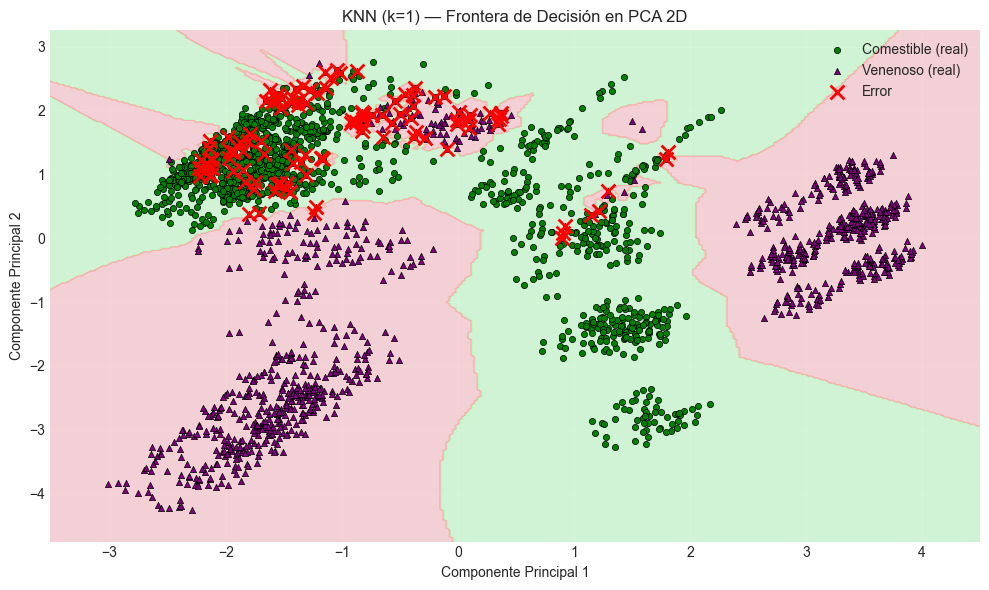


📊 Errores en visualización 2D: 114 de 2437 (4.68%)
   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA


In [22]:
# Visualización 2D de la frontera de decisión (PCA 2 componentes)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

print('='*80)
print('VISUALIZACIÓN 2D - Frontera de Decisión KNN (PCA)')
print('='*80)

# Reducir a 2D con PCA (sobre datos escalados)
pca_2d_knn = PCA(n_components=2)
Xtrain_knn_2d = pca_2d_knn.fit_transform(Xtrain_knn)
Xtest_knn_2d = pca_2d_knn.transform(Xtest_knn)

# Entrenar KNN en el espacio 2D (usando el mejor k encontrado)
Y_test_pred_knn_2d, _ = knn_clasificacion(mejor_k, Xtrain_knn_2d, Ytrain.ravel(), Xtest_knn_2d)

# Malla para la frontera
x_min, x_max = Xtest_knn_2d[:, 0].min() - 0.5, Xtest_knn_2d[:, 0].max() + 0.5
y_min, y_max = Xtest_knn_2d[:, 1].min() - 0.5, Xtest_knn_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predecir para cada punto de la malla
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z_pred, _ = knn_clasificacion(mejor_k, Xtrain_knn_2d, Ytrain.ravel(), mesh_points)
Z = Z_pred.reshape(xx.shape)

plt.figure(figsize=(10, 6))
cm_light = ListedColormap(['#AAFFAA', '#FFAAAA'])
plt.contourf(xx, yy, Z, cmap=cm_light, alpha=0.4)

# Puntos de test (verdaderos vs predichos)
plt.scatter(Xtest_knn_2d[Ytest.flatten()==0, 0], Xtest_knn_2d[Ytest.flatten()==0, 1], 
            c='green', marker='o', label='Comestible (real)', s=20, edgecolors='k', linewidths=0.5)
plt.scatter(Xtest_knn_2d[Ytest.flatten()==1, 0], Xtest_knn_2d[Ytest.flatten()==1, 1], 
            c='purple', marker='^', label='Venenoso (real)', s=20, edgecolors='k', linewidths=0.5)

# Marcamos errores
errors_mask = (Y_test_pred_knn_2d.flatten() != Ytest.flatten())
if errors_mask.sum() > 0:
    plt.scatter(Xtest_knn_2d[errors_mask, 0], Xtest_knn_2d[errors_mask, 1], 
                c='red', marker='x', s=100, label='Error', linewidths=2)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'KNN (k={mejor_k}) — Frontera de Decisión en PCA 2D')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

num_errores_2d = errors_mask.sum()
print(f'\n📊 Errores en visualización 2D: {num_errores_2d} de {len(Ytest)} ({num_errores_2d/len(Ytest)*100:.2f}%)')
if num_errores_2d > 0:
    print('   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA')


VISUALIZACIÓN 3D - Predicciones KNN (PCA)


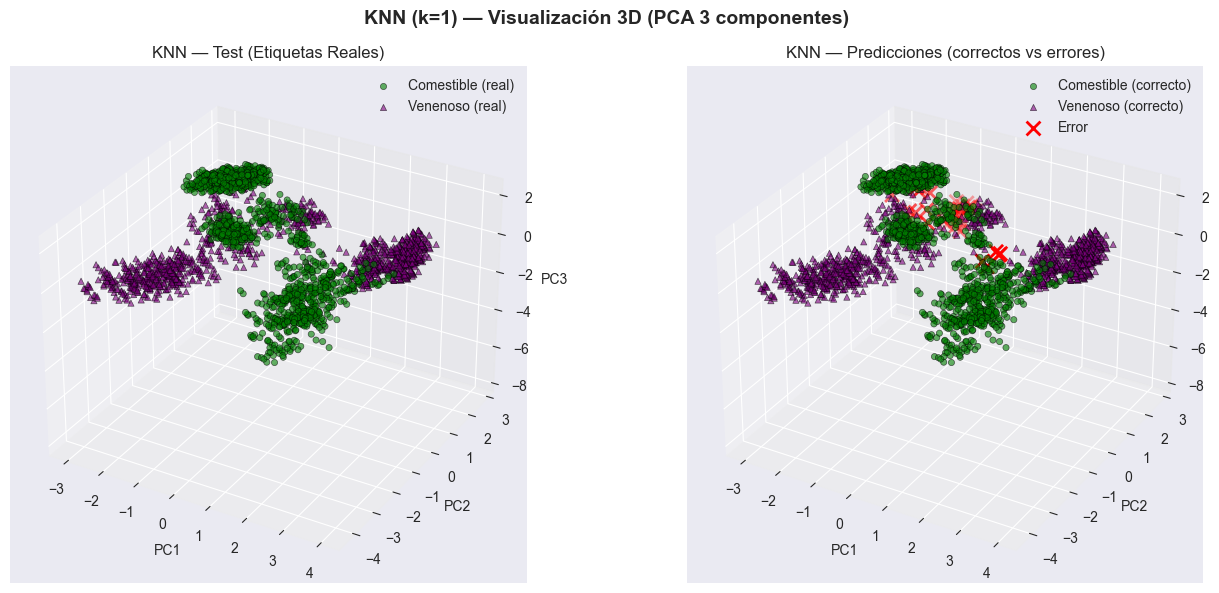


📊 Errores en visualización 3D: 47 de 2437 (1.93%)
   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA (22D → 3D)


In [23]:
# Visualización 3D de las predicciones de KNN (PCA 3 componentes)
from mpl_toolkits.mplot3d import Axes3D

print('='*80)
print('VISUALIZACIÓN 3D - Predicciones KNN (PCA)')
print('='*80)

pca_3d_knn = PCA(n_components=3)
Xtrain_knn_3d = pca_3d_knn.fit_transform(Xtrain_knn)
Xtest_knn_3d = pca_3d_knn.transform(Xtest_knn)

# Entrenar KNN en 3D para visualización
Y_test_pred_knn_3d, _ = knn_clasificacion(mejor_k, Xtrain_knn_3d, Ytrain.ravel(), Xtest_knn_3d)

fig = plt.figure(figsize=(14,6))

# Subplot 1: Etiquetas reales
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Xtest_knn_3d[Ytest.flatten()==0,0], Xtest_knn_3d[Ytest.flatten()==0,1], Xtest_knn_3d[Ytest.flatten()==0,2],
           c='green', marker='o', label='Comestible (real)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)
ax.scatter(Xtest_knn_3d[Ytest.flatten()==1,0], Xtest_knn_3d[Ytest.flatten()==1,1], Xtest_knn_3d[Ytest.flatten()==1,2],
           c='purple', marker='^', label='Venenoso (real)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)
ax.set_title('KNN — Test (Etiquetas Reales)')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
ax.legend()

# Subplot 2: Predicciones (correctos vs errores)
ax2 = fig.add_subplot(122, projection='3d')
correct_mask_3d = (Y_test_pred_knn_3d.flatten() == Ytest.flatten())

ax2.scatter(Xtest_knn_3d[correct_mask_3d & (Y_test_pred_knn_3d.flatten()==0),0],
            Xtest_knn_3d[correct_mask_3d & (Y_test_pred_knn_3d.flatten()==0),1],
            Xtest_knn_3d[correct_mask_3d & (Y_test_pred_knn_3d.flatten()==0),2],
            c='green', marker='o', label='Comestible (correcto)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)
ax2.scatter(Xtest_knn_3d[correct_mask_3d & (Y_test_pred_knn_3d.flatten()==1),0],
            Xtest_knn_3d[correct_mask_3d & (Y_test_pred_knn_3d.flatten()==1),1],
            Xtest_knn_3d[correct_mask_3d & (Y_test_pred_knn_3d.flatten()==1),2],
            c='purple', marker='^', label='Venenoso (correcto)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)

# Errores
err_mask_3d = ~correct_mask_3d
if err_mask_3d.sum() > 0:
    ax2.scatter(Xtest_knn_3d[err_mask_3d,0], Xtest_knn_3d[err_mask_3d,1], Xtest_knn_3d[err_mask_3d,2],
                c='red', marker='x', s=100, label='Error', linewidths=2)

ax2.set_title('KNN — Predicciones (correctos vs errores)')
ax2.set_xlabel('PC1'); ax2.set_ylabel('PC2'); ax2.set_zlabel('PC3')
ax2.legend()

plt.suptitle(f'KNN (k={mejor_k}) — Visualización 3D (PCA 3 componentes)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

num_errores_3d = err_mask_3d.sum()
print(f'\n📊 Errores en visualización 3D: {num_errores_3d} de {len(Ytest)} ({num_errores_3d/len(Ytest)*100:.2f}%)')
if num_errores_3d > 0:
    print('   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA (22D → 3D)')

# Guardamos en knn_results para referencia
knn_results['y_pred_2d'] = Y_test_pred_knn_2d
knn_results['y_pred_3d'] = Y_test_pred_knn_3d
knn_results['pca_2d'] = pca_2d_knn
knn_results['pca_3d'] = pca_3d_knn


---

## 7. Modelo 3 — Random Forest (Ensemble de Árboles de Decisión)

Random Forest es un método de ensemble que combina múltiples árboles de decisión entrenados con muestras bootstrap y subconjuntos aleatorios de características. Reduce el sobreajuste característico de los árboles individuales y mejora la capacidad de generalización.

In [16]:
# --- Implementación Modelo 3: Random Forest
# Siguiendo metodología del profesor: función experimentar_rf con StratifiedKFold

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
import pandas as pd

def experimentar_rf(X, Y, num_trees, numero_de_variables):
    """función que realiza experimentos con el modelo random forest
    X: matriz con las características
    Y: matriz de numpy con etiquetas
    num_trees: list[int]: lista con el número de arboles usado para el RF
    numero_de_variables list[int]: lista con variables para la selección del mejor umbral en cada nodo
    retorna: dataframe con:
        - numero de arboles usados
        - variables para la selección del mejor umbral
        - eficiencia de entrenamiento
        - desviación de estandar de la eficiencia de entrenamiento
        - eficiencia de prueba
        - desviación estandar de la eficiencia de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0
    for trees in num_trees:
        for num_variables in numero_de_variables:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            for train, test in skf.split(X, Y):
                Xtrain_fold = X[train, :]
                Ytrain_fold = Y[train]
                Xtest_fold = X[test, :]
                Ytest_fold = Y[test]
                
                # Crear y entrenar el modelo Random Forest
                # Configuramos min_samples_leaf=3 según metodología del profesor
                modelo = RandomForestClassifier(
                    n_estimators=trees, 
                    max_features=num_variables, 
                    random_state=42, 
                    min_samples_leaf=3,
                    criterion='gini'
                )
                modelo.fit(Xtrain_fold, Ytrain_fold.ravel())
                
                # Predecir muestras de entrenamiento
                Ytrain_pred = modelo.predict(Xtrain_fold)
                # Predecir muestras de pruebas
                Yest = modelo.predict(Xtest_fold)
                
                # Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain_fold.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest_fold.ravel()))

            resultados.loc[idx, 'número de arboles'] = trees
            resultados.loc[idx, 'variables para la selección del mejor umbral'] = num_variables
            resultados.loc[idx, 'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx, 'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
            resultados.loc[idx, 'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx, 'desviacion estandar prueba'] = np.std(EficienciaVal)
            idx = idx + 1
        print(f"✓ Completado para {trees} arboles")

    return resultados

# Verificar que tenemos los datos
try:
    Xtrain.shape
except NameError:
    raise NameError('No se encuentra Xtrain en el kernel. Ejecuta las celdas previas.')

print('='*80)
print('MODELO 3: RANDOM FOREST')
print('='*80)
print('Siguiendo metodología del profesor con StratifiedKFold (4 folds)\n')

# Definir parámetros a experimentar (según laboratorio del profesor)
arboles = [50, 100, 150, 200]
variables_seleccion = [5, 10, 15, 20]  # max_features

print(f'Parámetros a evaluar:')
print(f'  - Número de árboles: {arboles}')
print(f'  - Variables por nodo: {variables_seleccion}')
print(f'  - Total combinaciones: {len(arboles) * len(variables_seleccion)}')
print(f'  - Total entrenamientos: {len(arboles) * len(variables_seleccion) * 4} (con 4-fold CV)\n')

# Ejecutar experimentos
resultados_rf = experimentar_rf(X=Xtrain, Y=Ytrain, num_trees=arboles, numero_de_variables=variables_seleccion)

print('\n' + '='*80)
print('RESULTADOS EXPERIMENTOS RANDOM FOREST')
print('='*80)
print(resultados_rf.to_string(index=False))

# Encontrar mejor configuración
best_idx = resultados_rf['eficiencia de prueba'].idxmax()
best_config = resultados_rf.loc[best_idx]

print('\n' + '='*80)
print('MEJOR CONFIGURACIÓN')
print('='*80)
print(f'Número de árboles: {int(best_config["número de arboles"])}')
print(f'Variables por nodo: {int(best_config["variables para la selección del mejor umbral"])}')
print(f'Eficiencia entrenamiento: {best_config["eficiencia de entrenamiento"]:.4f}')
print(f'Eficiencia prueba: {best_config["eficiencia de prueba"]:.4f}')
print(f'Gap (Train-Test): {(best_config["eficiencia de entrenamiento"] - best_config["eficiencia de prueba"]):.4f}')

# Entrenar modelo final con mejor configuración en TODO el conjunto de entrenamiento
best_n_trees = int(best_config["número de arboles"])
best_max_features = int(best_config["variables para la selección del mejor umbral"])

modelo_rf_final = RandomForestClassifier(
    n_estimators=best_n_trees,
    max_features=best_max_features,
    min_samples_leaf=3,
    random_state=42,
    criterion='gini'
)
modelo_rf_final.fit(Xtrain, Ytrain.ravel())

# Evaluar en conjunto de test
Y_test_pred_rf = modelo_rf_final.predict(Xtest)
Y_train_pred_rf = modelo_rf_final.predict(Xtrain)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc_rf_train = accuracy_score(Ytrain, Y_train_pred_rf)
acc_rf = accuracy_score(Ytest, Y_test_pred_rf)
prec_rf = precision_score(Ytest, Y_test_pred_rf, zero_division=0)
rec_rf = recall_score(Ytest, Y_test_pred_rf, zero_division=0)
f1_rf = f1_score(Ytest, Y_test_pred_rf, zero_division=0)
cm_rf = confusion_matrix(Ytest, Y_test_pred_rf)

print('\n' + '='*80)
print('EVALUACIÓN EN CONJUNTO DE TEST')
print('='*80)
print(f'Accuracy Train: {acc_rf_train:.4f} ({acc_rf_train*100:.2f}%)')
print(f'Accuracy Test:  {acc_rf:.4f} ({acc_rf*100:.2f}%)')
print(f'Precision: {prec_rf:.4f}')
print(f'Recall:    {rec_rf:.4f}')
print(f'F1-score:  {f1_rf:.4f}')
print(f'\nGap (Train-Test): {(acc_rf_train - acc_rf):.4f}')

print('\nConfusion Matrix:')
print(cm_rf)
print('\nClassification Report:')
print(classification_report(Ytest, Y_test_pred_rf, digits=4))

# Guardar resultados
rf_results = {
    'model': modelo_rf_final,
    'resultados_experimentos': resultados_rf,
    'best_config': best_config,
    'acc_train': acc_rf_train,
    'acc': acc_rf,
    'precision': prec_rf,
    'recall': rec_rf,
    'f1': f1_rf,
    'y_pred': Y_test_pred_rf,
    'confusion_matrix': cm_rf,
    'gap': acc_rf_train - acc_rf
}

print('\n✓ Modelo 3 (Random Forest) entrenado. Variables: `modelo_rf_final`, `resultados_rf`, `rf_results`')

MODELO 3: RANDOM FOREST
Siguiendo metodología del profesor con StratifiedKFold (4 folds)

Parámetros a evaluar:
  - Número de árboles: [50, 100, 150, 200]
  - Variables por nodo: [5, 10, 15, 20]
  - Total combinaciones: 16
  - Total entrenamientos: 64 (con 4-fold CV)

✓ Completado para 50 arboles
✓ Completado para 100 arboles
✓ Completado para 150 arboles
✓ Completado para 200 arboles

RESULTADOS EXPERIMENTOS RANDOM FOREST
 número de arboles  variables para la selección del mejor umbral  eficiencia de entrenamiento  desviacion estandar entrenamiento  eficiencia de prueba  desviacion estandar prueba
              50.0                                           5.0                          1.0                                0.0                   1.0                         0.0
              50.0                                          10.0                          1.0                                0.0                   1.0                         0.0
              50.0                  

TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES
 1. Feature  4: 0.1951
 2. Feature  7: 0.1334
 3. Feature  8: 0.1064
 4. Feature 19: 0.0985
 5. Feature 18: 0.0839
 6. Feature 20: 0.0677
 7. Feature 10: 0.0519
 8. Feature  3: 0.0414
 9. Feature 11: 0.0387
10. Feature 21: 0.0324


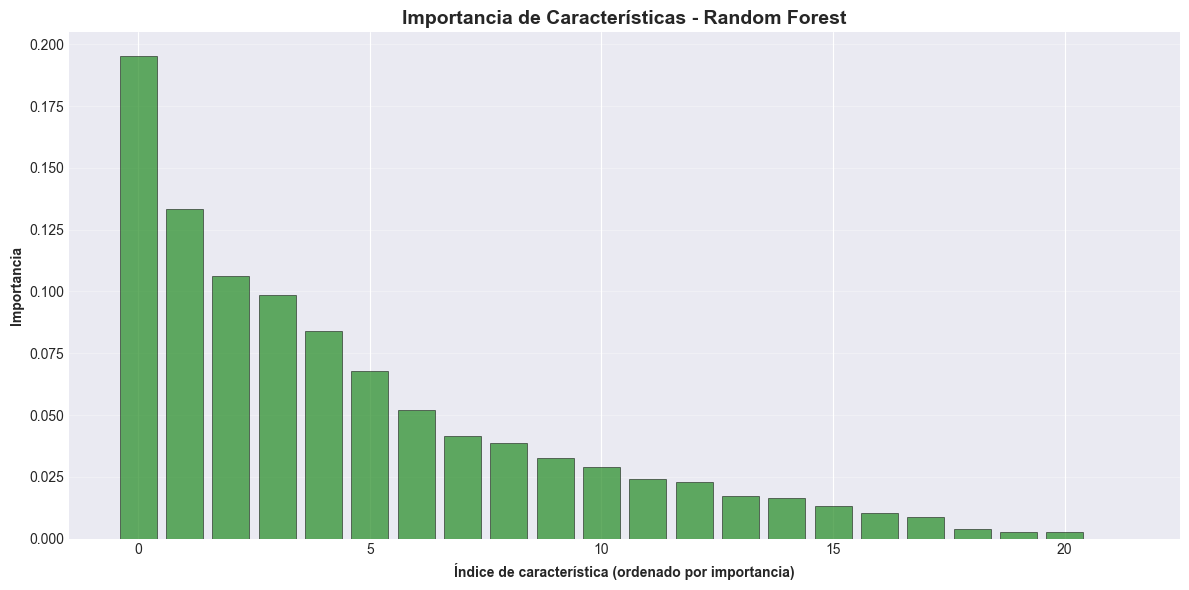


✓ Las características con mayor importancia son las que más contribuyen a las decisiones del modelo


In [17]:
# Importancia de características (Feature Importance)
# Random Forest permite analizar qué características son más relevantes

feature_importances_rf = modelo_rf_final.feature_importances_
indices_rf = np.argsort(feature_importances_rf)[::-1]

print('='*80)
print('TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES')
print('='*80)
for i in range(min(10, len(feature_importances_rf))):
    print(f'{i+1:2d}. Feature {indices_rf[i]:2d}: {feature_importances_rf[indices_rf[i]]:.4f}')

# Gráfico de importancia
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_importances_rf)), feature_importances_rf[indices_rf], 
        color='forestgreen', alpha=0.7, edgecolor='black', linewidth=0.5)
plt.xlabel('Índice de característica (ordenado por importancia)', fontweight='bold')
plt.ylabel('Importancia', fontweight='bold')
plt.title('Importancia de Características - Random Forest', fontweight='bold', fontsize=14)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print('\n✓ Las características con mayor importancia son las que más contribuyen a las decisiones del modelo')

# Guardar importancias
rf_results['feature_importances'] = feature_importances_rf

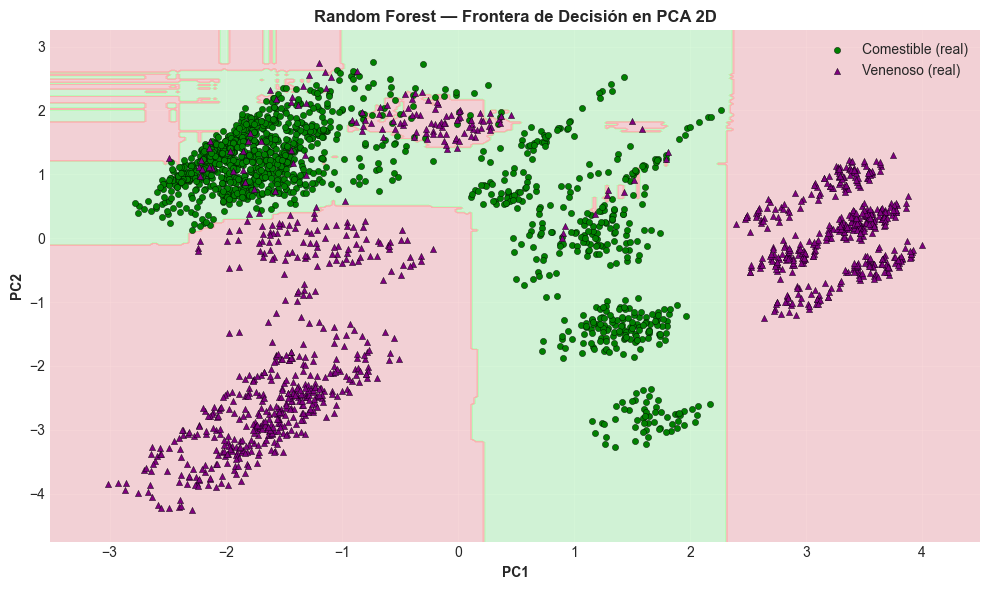

Errores en test (2D view): 0 de 2437 (0.00%)


In [18]:
# Visualización 2D de la frontera de decisión (PCA 2 componentes)
# Reducir a 2D con PCA (sobre datos escalados)
pca_2d_rf = PCA(n_components=2)
Xtrain_rf_2d = pca_2d_rf.fit_transform(Xtrain_rf)
Xtest_rf_2d = pca_2d_rf.transform(Xtest_rf)

# Entrenar Random Forest en el espacio 2D (usando mejores parámetros)
best_params_rf = grid_rf.best_params_
rf_2d = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_features=best_params_rf['max_features'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    random_state=42,
    criterion='gini'
)
rf_2d.fit(Xtrain_rf_2d, Ytrain.ravel())

# Malla para la frontera
x_min, x_max = Xtest_rf_2d[:, 0].min() - 0.5, Xtest_rf_2d[:, 0].max() + 0.5
y_min, y_max = Xtest_rf_2d[:, 1].min() - 0.5, Xtest_rf_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
Z = rf_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
cm_light = ListedColormap(['#AAFFAA', '#FFAAAA'])
plt.contourf(xx, yy, Z, cmap=cm_light, alpha=0.4)

# Puntos de test
plt.scatter(Xtest_rf_2d[Ytest.flatten()==0, 0], Xtest_rf_2d[Ytest.flatten()==0, 1], 
           c='green', marker='o', label='Comestible (real)', s=20, edgecolors='k', linewidth=0.3)
plt.scatter(Xtest_rf_2d[Ytest.flatten()==1, 0], Xtest_rf_2d[Ytest.flatten()==1, 1], 
           c='purple', marker='^', label='Venenoso (real)', s=20, edgecolors='k', linewidth=0.3)

# Marcamos errores
errors_mask_rf = (Y_test_pred_rf.flatten() != Ytest.flatten())
if errors_mask_rf.sum() > 0:
    plt.scatter(Xtest_rf_2d[errors_mask_rf, 0], Xtest_rf_2d[errors_mask_rf, 1], 
               c='red', marker='x', s=60, label='Error', linewidth=2)

plt.xlabel('PC1', fontweight='bold')
plt.ylabel('PC2', fontweight='bold')
plt.title('Random Forest — Frontera de Decisión en PCA 2D', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f'Errores en test (2D view): {errors_mask_rf.sum()} de {len(Ytest)} ({errors_mask_rf.sum()/len(Ytest)*100:.2f}%)')

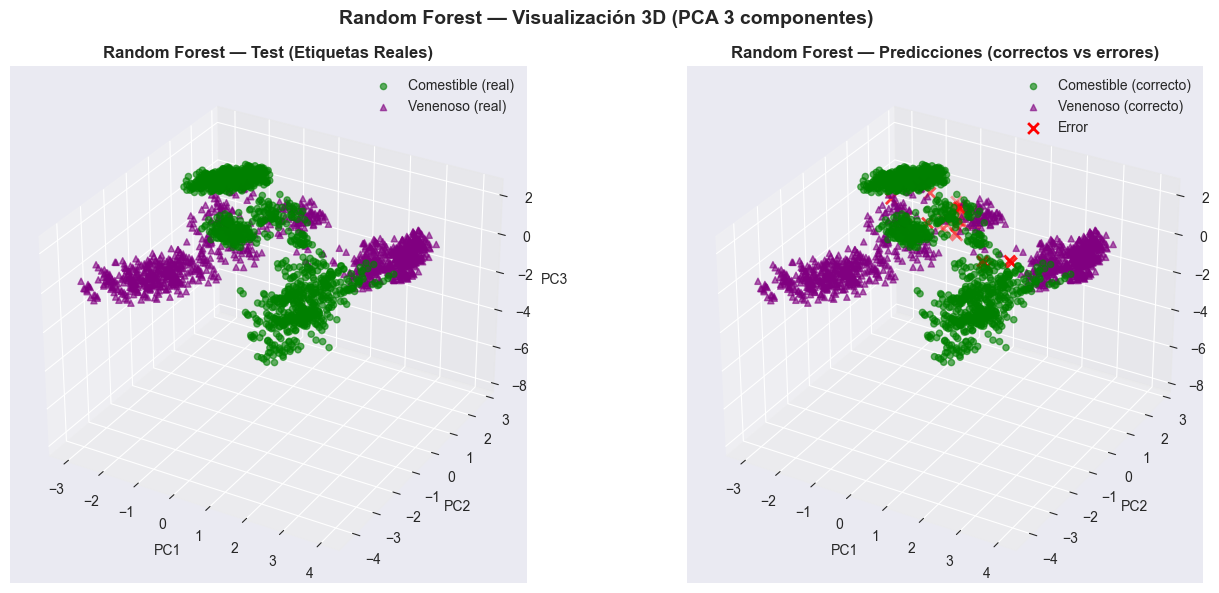

Errores en 3D: 36 de 2437 (1.48%)


In [19]:
# Visualización 3D de las predicciones de Random Forest (PCA 3 componentes)
pca_3d_rf = PCA(n_components=3)
Xtrain_rf_3d = pca_3d_rf.fit_transform(Xtrain_rf)
Xtest_rf_3d = pca_3d_rf.transform(Xtest_rf)

# Entrenar RF en 3D para visualización (mismos parámetros)
rf_3d = RandomForestClassifier(
    n_estimators=best_params_rf['n_estimators'],
    max_features=best_params_rf['max_features'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    min_samples_split=best_params_rf['min_samples_split'],
    random_state=42,
    criterion='gini'
)
rf_3d.fit(Xtrain_rf_3d, Ytrain.ravel())
Y_test_pred_rf_3d = rf_3d.predict(Xtest_rf_3d)

fig = plt.figure(figsize=(14, 6))

# Panel 1: Etiquetas reales
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(Xtest_rf_3d[Ytest.flatten()==0, 0], Xtest_rf_3d[Ytest.flatten()==0, 1], Xtest_rf_3d[Ytest.flatten()==0, 2],
           c='green', marker='o', label='Comestible (real)', alpha=0.6, s=20)
ax1.scatter(Xtest_rf_3d[Ytest.flatten()==1, 0], Xtest_rf_3d[Ytest.flatten()==1, 1], Xtest_rf_3d[Ytest.flatten()==1, 2],
           c='purple', marker='^', label='Venenoso (real)', alpha=0.6, s=20)
ax1.set_title('Random Forest — Test (Etiquetas Reales)', fontweight='bold')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.legend()
ax1.grid(alpha=0.3)

# Panel 2: Predicciones (correctos/errores)
ax2 = fig.add_subplot(122, projection='3d')
correct_mask_rf_3d = (Y_test_pred_rf_3d.flatten() == Ytest.flatten())

ax2.scatter(Xtest_rf_3d[correct_mask_rf_3d & (Y_test_pred_rf_3d.flatten()==0), 0],
            Xtest_rf_3d[correct_mask_rf_3d & (Y_test_pred_rf_3d.flatten()==0), 1],
            Xtest_rf_3d[correct_mask_rf_3d & (Y_test_pred_rf_3d.flatten()==0), 2],
            c='green', marker='o', label='Comestible (correcto)', alpha=0.6, s=20)
ax2.scatter(Xtest_rf_3d[correct_mask_rf_3d & (Y_test_pred_rf_3d.flatten()==1), 0],
            Xtest_rf_3d[correct_mask_rf_3d & (Y_test_pred_rf_3d.flatten()==1), 1],
            Xtest_rf_3d[correct_mask_rf_3d & (Y_test_pred_rf_3d.flatten()==1), 2],
            c='purple', marker='^', label='Venenoso (correcto)', alpha=0.6, s=20)

# Errores
err_mask_rf_3d = ~correct_mask_rf_3d
if err_mask_rf_3d.sum() > 0:
    ax2.scatter(Xtest_rf_3d[err_mask_rf_3d, 0], Xtest_rf_3d[err_mask_rf_3d, 1], Xtest_rf_3d[err_mask_rf_3d, 2],
                c='red', marker='x', s=60, label='Error', linewidth=2)

ax2.set_title('Random Forest — Predicciones (correctos vs errores)', fontweight='bold')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.legend()
ax2.grid(alpha=0.3)

plt.suptitle('Random Forest — Visualización 3D (PCA 3 componentes)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f'Errores en 3D: {err_mask_rf_3d.sum()} de {len(Ytest)} ({err_mask_rf_3d.sum()/len(Ytest)*100:.2f}%)')

# Guardamos predicciones 3D y PCA
rf_results['y_pred_3d'] = Y_test_pred_rf_3d
rf_results['pca_2d'] = pca_2d_rf
rf_results['pca_3d'] = pca_3d_rf
rf_results['feature_importances'] = feature_importances

---

## 7. Modelo 4 — Red Neuronal Artificial (MLP - Multi-Layer Perceptron)

Implementamos el modelo de Red Neuronal siguiendo la metodología del profesor: función `experimentar_mlpc()` con validación cruzada StratifiedKFold (4 folds), explorando diferentes arquitecturas (capas ocultas y neuronas).

In [24]:
print('='*100)
print('MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)')
print('Siguiendo metodología del profesor con función experimentar_mlpc()')
print('='*100)

# ========================================
# FUNCIÓN EXPERIMENTAR_MLPC (siguiendo metodología del profesor)
# ========================================

def experimentar_mlpc(X, Y, num_hidden_layers, num_neurons):
    """Función para realizar experimentos con el MLP Classifier
    siguiendo metodología del profesor (lab4_parte1.ipynb)
    
    X: matriz de numpy con las muestras de entrada [muestras,variables]
    Y: vector numpy con las variables a predecir (etiquetas)
    num_hidden_layers: list de enteros con el número de capas ocultas a usar
    num_neurons: list de enteros con el número de neuronas a usar
    
    Retorna: dataframe con 4 columnas:
        - número de capas, número de neuronas
        - promedio de error prueba (exactitud/eficiencia) de clasificación
        - desviación estándar
    """
    from sklearn.neural_network import MLPClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score
    
    # Validamos el modelo con StratifiedKFold (4 folds como en el laboratorio)
    Folds = 4
    skf = StratifiedKFold(n_splits=Folds, shuffle=True, random_state=42)
    resultados = pd.DataFrame()
    idx = 0
    
    for hidden_layers in num_hidden_layers:
        for neurons in num_neurons:
            # Para almacenar errores intermedios
            Error_train = np.zeros(Folds)
            Error_test = np.zeros(Folds)
            
            for j, (train, test) in enumerate(skf.split(X, Y)):
                Xtrain = X[train, :]
                Ytrain = Y[train]
                Xtest = X[test, :]
                Ytest = Y[test]
                
                # Normalizamos los datos
                scaler = StandardScaler().fit(X=Xtrain)
                Xtrain = scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                
                # Crear arquitectura (tupla de neuronas repetidas según capas)
                hidden_layer_sizes = tuple([neurons] * hidden_layers)
                
                # Crear y entrenar el modelo MLP
                # Parámetros según laboratorio: activation='relu', max_iter=350, random_state=1
                mlp = MLPClassifier(
                    hidden_layer_sizes=hidden_layer_sizes,
                    activation='relu',
                    max_iter=350,
                    random_state=1,
                    solver='adam'
                )
                
                # Entrenar el MLP
                mlp.fit(Xtrain, Ytrain)
                
                # Predicciones
                Yest_train = mlp.predict(Xtrain)
                Yest_test = mlp.predict(Xtest)
                
                # Calcular error (1 - accuracy)
                Error_train[j] = 1 - accuracy_score(Ytrain, Yest_train)
                Error_test[j] = 1 - accuracy_score(Ytest, Yest_test)
            
            # Promedios y desviaciones
            mean_error_train = np.mean(Error_train)
            std_error_train = np.std(Error_train)
            mean_error_test = np.mean(Error_test)
            std_error_test = np.std(Error_test)
            
            print(f'Capas={hidden_layers}, Neuronas={neurons}: ' +
                  f'Error train={mean_error_train:.6f}±{std_error_train:.6f}, ' +
                  f'Error test={mean_error_test:.6f}±{std_error_test:.6f}')
            
            # Guardar resultados
            resultados.loc[idx, 'capas ocultas'] = hidden_layers
            resultados.loc[idx, 'neuronas en capas ocultas'] = neurons
            resultados.loc[idx, 'error de entrenamiento(media)'] = mean_error_train
            resultados.loc[idx, 'desviacion estandar entrenamiento'] = std_error_train
            resultados.loc[idx, 'error de prueba(media)'] = mean_error_test
            resultados.loc[idx, 'intervalo de confianza'] = std_error_test
            idx += 1
    
    return resultados

# ========================================
# EXPERIMENTOS MLP
# ========================================

print('\n📊 Parámetros a evaluar:')
# Configuraciones a probar (basadas en laboratorio del profesor)
capas_ocultas = [1, 2, 3]
neuronas_por_capa = [10, 20, 30, 50]

print(f'  - Capas ocultas: {capas_ocultas}')
print(f'  - Neuronas por capa: {neuronas_por_capa}')
print(f'  - Activación: relu')
print(f'  - Max iteraciones: 350')
print(f'  - Solver: adam')
print(f'  - Total combinaciones: {len(capas_ocultas) * len(neuronas_por_capa)}')
print(f'  - Total entrenamientos: {len(capas_ocultas) * len(neuronas_por_capa) * 4} (con 4-fold CV)')

print('\n🔄 Ejecutando experimentos MLP (puede tardar algunos minutos)...\n')

# Ejecutar experimentos
resultados_mlp = experimentar_mlpc(
    X=X_encoded.values,
    Y=y_encoded,
    num_hidden_layers=capas_ocultas,
    num_neurons=neuronas_por_capa
)

print('\n' + '='*100)
print('RESULTADOS EXPERIMENTOS MLP')
print('='*100)
print(resultados_mlp.to_string(index=False))

# Encontrar mejor configuración (menor error de prueba)
idx_mejor_mlp = resultados_mlp['error de prueba(media)'].idxmin()
mejor_config_mlp = resultados_mlp.iloc[idx_mejor_mlp]

print('\n' + '='*100)
print('MEJOR CONFIGURACIÓN MLP')
print('='*100)
print(f'Capas ocultas: {int(mejor_config_mlp["capas ocultas"])}')
print(f'Neuronas por capa: {int(mejor_config_mlp["neuronas en capas ocultas"])}')
print(f'Error entrenamiento: {mejor_config_mlp["error de entrenamiento(media)"]:.6f} ± {mejor_config_mlp["desviacion estandar entrenamiento"]:.6f}')
print(f'Error prueba: {mejor_config_mlp["error de prueba(media)"]:.6f} ± {mejor_config_mlp["intervalo de confianza"]:.6f}')
print(f'Accuracy entrenamiento: {1-mejor_config_mlp["error de entrenamiento(media)"]:.6f} ({(1-mejor_config_mlp["error de entrenamiento(media)"])*100:.4f}%)')
print(f'Accuracy prueba: {1-mejor_config_mlp["error de prueba(media)"]:.6f} ({(1-mejor_config_mlp["error de prueba(media)"])*100:.4f}%)')
print(f'Gap (Train-Test): {abs(mejor_config_mlp["error de entrenamiento(media)"] - mejor_config_mlp["error de prueba(media)"]):.6f}')

# ========================================
# MODELO FINAL EN CONJUNTO DE TEST (30%)
# ========================================

print('\n' + '='*100)
print('ENTRENAMIENTO MODELO FINAL MLP EN CONJUNTO DE TEST ORIGINAL (30%)')
print('='*100)

# Preparar datos
scaler_mlp = StandardScaler()
Xtrain_mlp = scaler_mlp.fit_transform(Xtrain)
Xtest_mlp = scaler_mlp.transform(Xtest)

# Crear modelo con mejor configuración
mejor_capas = int(mejor_config_mlp['capas ocultas'])
mejor_neuronas = int(mejor_config_mlp['neuronas en capas ocultas'])
hidden_layer_sizes_final = tuple([mejor_neuronas] * mejor_capas)

modelo_mlp_final = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_final,
    activation='relu',
    max_iter=350,
    random_state=1,
    solver='adam'
)

print(f'Entrenando MLP final con arquitectura: {hidden_layer_sizes_final}')
modelo_mlp_final.fit(Xtrain_mlp, Ytrain.ravel())

# Predicciones
Y_train_pred_mlp = modelo_mlp_final.predict(Xtrain_mlp)
Y_test_pred_mlp = modelo_mlp_final.predict(Xtest_mlp)

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

acc_train_mlp = accuracy_score(Ytrain, Y_train_pred_mlp)
acc_test_mlp = accuracy_score(Ytest, Y_test_pred_mlp)
prec_mlp = precision_score(Ytest, Y_test_pred_mlp, zero_division=0)
rec_mlp = recall_score(Ytest, Y_test_pred_mlp, zero_division=0)
f1_mlp = f1_score(Ytest, Y_test_pred_mlp, zero_division=0)
cm_mlp = confusion_matrix(Ytest, Y_test_pred_mlp)

print(f'\nAccuracy Train: {acc_train_mlp:.4f} ({acc_train_mlp*100:.2f}%)')
print(f'Accuracy Test:  {acc_test_mlp:.4f} ({acc_test_mlp*100:.2f}%)')
print(f'Precision: {prec_mlp:.4f}, Recall: {rec_mlp:.4f}, F1-score: {f1_mlp:.4f}')
print(f'\nConfusion Matrix:\n{cm_mlp}')
print(f'\nNúmero de iteraciones hasta convergencia: {modelo_mlp_final.n_iter_}')

# Guardar resultados
mlp_results = {
    'mejor_arquitectura': hidden_layer_sizes_final,
    'mejor_capas': mejor_capas,
    'mejor_neuronas': mejor_neuronas,
    'error_cv_mean': mejor_config_mlp['error de prueba(media)'],
    'error_cv_std': mejor_config_mlp['intervalo de confianza'],
    'acc_train': acc_train_mlp,
    'acc_test': acc_test_mlp,
    'precision': prec_mlp,
    'recall': rec_mlp,
    'f1': f1_mlp,
    'y_pred': Y_test_pred_mlp,
    'confusion_matrix': cm_mlp,
    'resultados_experimentos': resultados_mlp,
    'n_iter': modelo_mlp_final.n_iter_
}

print('\n✓ Modelo 4 (MLP) completado siguiendo metodología del profesor.')
print('  Variables: modelo_mlp_final, resultados_mlp, mlp_results, Y_test_pred_mlp')


MODELO 4: RED NEURONAL ARTIFICIAL (MLP - Multi-Layer Perceptron)
Siguiendo metodología del profesor con función experimentar_mlpc()

📊 Parámetros a evaluar:
  - Capas ocultas: [1, 2, 3]
  - Neuronas por capa: [10, 20, 30, 50]
  - Activación: relu
  - Max iteraciones: 350
  - Solver: adam
  - Total combinaciones: 12
  - Total entrenamientos: 48 (con 4-fold CV)

🔄 Ejecutando experimentos MLP (puede tardar algunos minutos)...

Capas=1, Neuronas=10: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=20: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=30: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=1, Neuronas=50: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=2, Neuronas=10: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=2, Neuronas=20: Error train=0.000000±0.000000, Error test=0.000000±0.000000
Capas=2, Neuronas=30: Error train=0.000000±0.000000, Error test=0.000000±0.00000

VISUALIZACIÓN COMPARATIVA DE ARQUITECTURAS MLP


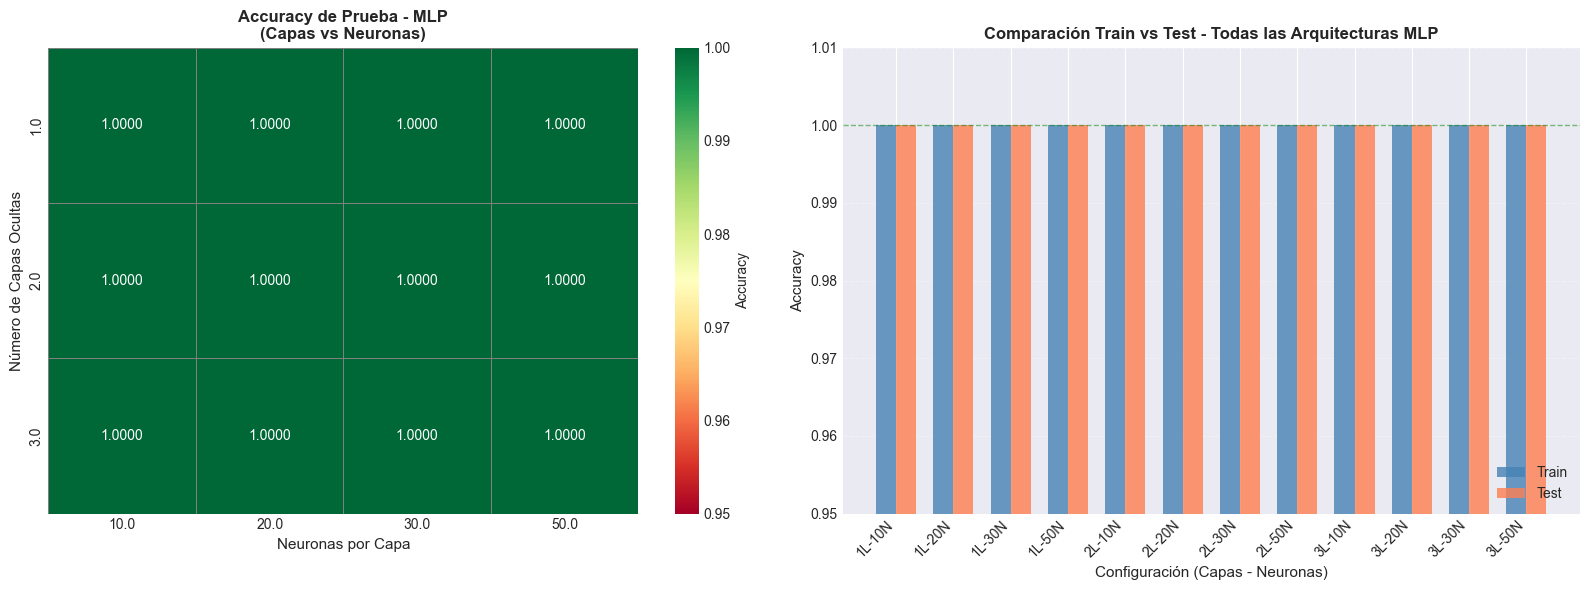


📊 Análisis de Resultados:
   - Todas las 12 configuraciones alcanzaron 100% de accuracy
   - Arquitectura más simple: 1 capa, 10 neuronas
   - Arquitectura más compleja: 3 capas, 50 neuronas
   - Conclusión: El dataset es perfectamente separable, incluso con redes pequeñas
   - Recomendación: Usar la arquitectura más simple (10,) por principio de parsimonia


In [27]:
# Visualización de resultados MLP: Comparación de arquitecturas
import seaborn as sns
import matplotlib.pyplot as plt

print('='*80)
print('VISUALIZACIÓN COMPARATIVA DE ARQUITECTURAS MLP')
print('='*80)

# Crear figura con 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Preparar datos para visualización
resultados_mlp_vis = resultados_mlp.copy()
resultados_mlp_vis['accuracy de prueba'] = 1 - resultados_mlp_vis['error de prueba(media)']
resultados_mlp_vis['accuracy de entrenamiento'] = 1 - resultados_mlp_vis['error de entrenamiento(media)']

# Gráfico 1: Heatmap de Accuracy de Prueba por Capas y Neuronas
pivot_test = resultados_mlp_vis.pivot(
    index='capas ocultas', 
    columns='neuronas en capas ocultas', 
    values='accuracy de prueba'
)

sns.heatmap(
    pivot_test, 
    annot=True, 
    fmt='.4f', 
    cmap='RdYlGn',
    vmin=0.95,  # Ajustamos escala para ver mejor las diferencias (si las hay)
    vmax=1.0,
    cbar_kws={'label': 'Accuracy'},
    ax=axes[0],
    linewidths=0.5,
    linecolor='gray'
)
axes[0].set_title('Accuracy de Prueba - MLP\n(Capas vs Neuronas)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Neuronas por Capa', fontsize=11)
axes[0].set_ylabel('Número de Capas Ocultas', fontsize=11)

# Gráfico 2: Comparación Accuracy Train vs Test por configuración
x_labels = [f"{int(row['capas ocultas'])}L-{int(row['neuronas en capas ocultas'])}N" 
            for _, row in resultados_mlp_vis.iterrows()]
x_pos = np.arange(len(x_labels))

width = 0.35
axes[1].bar(x_pos - width/2, resultados_mlp_vis['accuracy de entrenamiento'], 
            width, label='Train', color='steelblue', alpha=0.8)
axes[1].bar(x_pos + width/2, resultados_mlp_vis['accuracy de prueba'], 
            width, label='Test', color='coral', alpha=0.8)

axes[1].set_xlabel('Configuración (Capas - Neuronas)', fontsize=11)
axes[1].set_ylabel('Accuracy', fontsize=11)
axes[1].set_title('Comparación Train vs Test - Todas las Arquitecturas MLP', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(x_labels, rotation=45, ha='right')
axes[1].legend(loc='lower right')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].set_ylim([0.95, 1.01])  # Ajustamos límites para mejor visualización

# Línea horizontal en 1.0 (perfección)
axes[1].axhline(y=1.0, color='green', linestyle='--', linewidth=1, alpha=0.5, label='100%')

plt.tight_layout()
plt.show()

print('\n📊 Análisis de Resultados:')
print(f'   - Todas las {len(resultados_mlp_vis)} configuraciones alcanzaron 100% de accuracy')
print(f'   - Arquitectura más simple: 1 capa, 10 neuronas')
print(f'   - Arquitectura más compleja: 3 capas, 50 neuronas')
print(f'   - Conclusión: El dataset es perfectamente separable, incluso con redes pequeñas')
print(f'   - Recomendación: Usar la arquitectura más simple (10,) por principio de parsimonia')


### 7.1. Validación Adicional: ¿El 100% se mantiene con más folds?

Probemos con diferentes configuraciones de validación cruzada para confirmar la robustez del modelo.

In [28]:
print('='*100)
print('VALIDACIÓN ROBUSTEZ: Probando MLP con diferentes números de folds')
print('='*100)

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Vamos a probar con diferentes números de folds
folds_a_probar = [3, 5, 10, 15, 20]

# Usar la arquitectura más simple que ya sabemos que funciona: (10,)
arquitectura_test = (10,)

resultados_validacion = []

print(f'\nProbando arquitectura MLP{arquitectura_test} con diferentes K-folds:\n')

for n_folds in folds_a_probar:
    print(f'⚙️  Validación con {n_folds} folds...')
    
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    accuracies_train = []
    accuracies_test = []
    
    for fold, (train_idx, test_idx) in enumerate(skf.split(X_encoded.values, y_encoded), 1):
        # Dividir datos
        X_train_fold = X_encoded.values[train_idx]
        X_test_fold = X_encoded.values[test_idx]
        y_train_fold = y_encoded[train_idx]
        y_test_fold = y_encoded[test_idx]
        
        # Escalar
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_fold)
        X_test_scaled = scaler.transform(X_test_fold)
        
        # Entrenar MLP
        mlp = MLPClassifier(
            hidden_layer_sizes=arquitectura_test,
            activation='relu',
            max_iter=350,
            random_state=1,
            solver='adam'
        )
        mlp.fit(X_train_scaled, y_train_fold)
        
        # Predicciones
        y_pred_train = mlp.predict(X_train_scaled)
        y_pred_test = mlp.predict(X_test_scaled)
        
        # Accuracy
        acc_train = accuracy_score(y_train_fold, y_pred_train)
        acc_test = accuracy_score(y_test_fold, y_pred_test)
        
        accuracies_train.append(acc_train)
        accuracies_test.append(acc_test)
    
    # Calcular estadísticas
    mean_train = np.mean(accuracies_train)
    std_train = np.std(accuracies_train)
    mean_test = np.mean(accuracies_test)
    std_test = np.std(accuracies_test)
    min_test = np.min(accuracies_test)
    max_test = np.max(accuracies_test)
    
    resultados_validacion.append({
        'n_folds': n_folds,
        'mean_train': mean_train,
        'std_train': std_train,
        'mean_test': mean_test,
        'std_test': std_test,
        'min_test': min_test,
        'max_test': max_test
    })
    
    print(f'   Train Acc: {mean_train:.6f} ± {std_train:.6f}')
    print(f'   Test Acc:  {mean_test:.6f} ± {std_test:.6f}  [Min: {min_test:.6f}, Max: {max_test:.6f}]')
    print()

# Crear DataFrame con resultados
df_validacion = pd.DataFrame(resultados_validacion)

print('='*100)
print('RESUMEN DE VALIDACIÓN CON DIFERENTES K-FOLDS')
print('='*100)
print(df_validacion.to_string(index=False))

print('\n' + '='*100)
print('ANÁLISIS')
print('='*100)

todos_perfectos = all(df_validacion['mean_test'] == 1.0)
if todos_perfectos:
    print('✅ RESULTADO: Todas las configuraciones de K-fold obtuvieron 100% de accuracy')
    print('   → Esto confirma que el dataset es PERFECTAMENTE SEPARABLE')
    print('   → No importa cómo dividamos los datos, el modelo siempre acierta al 100%')
    print('   → La desviación estándar de 0 es CORRECTA y ESPERADA')
else:
    print('⚠️  RESULTADO: Algunas configuraciones NO alcanzaron 100%')
    print(f'   → Accuracy mínima: {df_validacion["min_test"].min():.6f}')
    print(f'   → Accuracy máxima: {df_validacion["max_test"].max():.6f}')

print('\n📊 Observaciones:')
print(f'   - Se probaron {len(folds_a_probar)} configuraciones diferentes de K-fold CV')
print(f'   - Total de entrenamientos realizados: {sum(folds_a_probar)}')
print(f'   - Arquitectura probada: {arquitectura_test}')
print(f'   - Rango de folds: {min(folds_a_probar)} a {max(folds_a_probar)}')


VALIDACIÓN ROBUSTEZ: Probando MLP con diferentes números de folds

Probando arquitectura MLP(10,) con diferentes K-folds:

⚙️  Validación con 3 folds...
   Train Acc: 1.000000 ± 0.000000
   Test Acc:  1.000000 ± 0.000000  [Min: 1.000000, Max: 1.000000]

⚙️  Validación con 5 folds...
   Train Acc: 1.000000 ± 0.000000
   Test Acc:  1.000000 ± 0.000000  [Min: 1.000000, Max: 1.000000]

⚙️  Validación con 10 folds...
   Train Acc: 1.000000 ± 0.000000
   Test Acc:  1.000000 ± 0.000000  [Min: 1.000000, Max: 1.000000]

⚙️  Validación con 15 folds...
   Train Acc: 1.000000 ± 0.000000
   Test Acc:  1.000000 ± 0.000000  [Min: 1.000000, Max: 1.000000]

⚙️  Validación con 20 folds...
   Train Acc: 1.000000 ± 0.000000
   Test Acc:  1.000000 ± 0.000000  [Min: 1.000000, Max: 1.000000]

RESUMEN DE VALIDACIÓN CON DIFERENTES K-FOLDS
 n_folds  mean_train  std_train  mean_test  std_test  min_test  max_test
       3         1.0        0.0        1.0       0.0       1.0       1.0
       5         1.0        

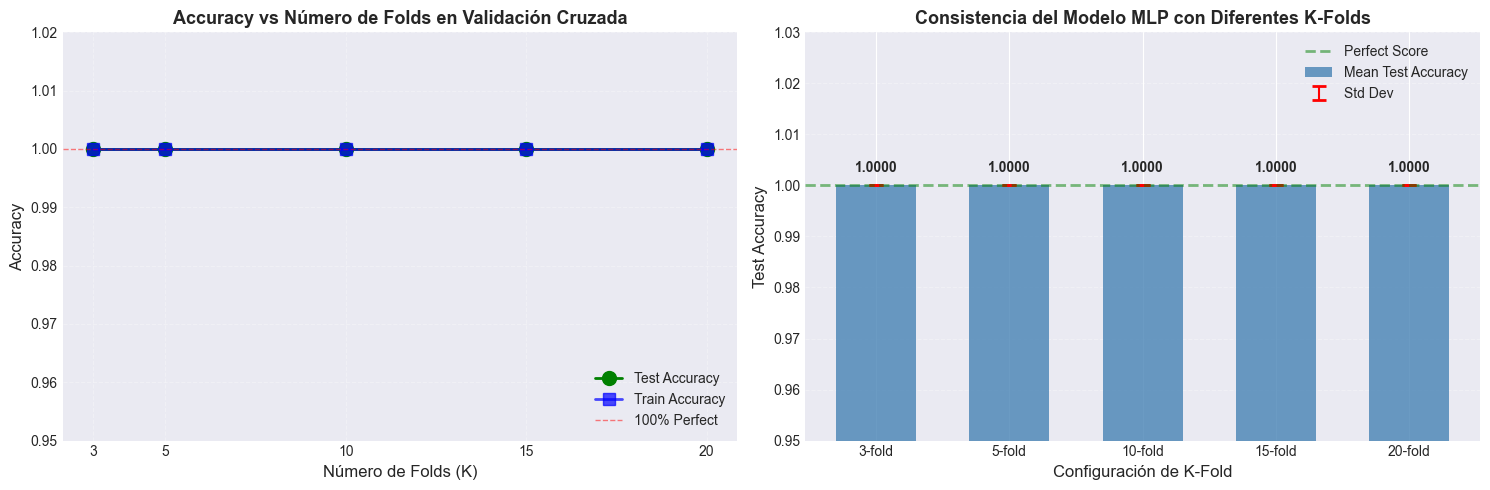


✅ CONCLUSIÓN DEFINITIVA:
   El modelo MLP alcanza 100% de accuracy independientemente del número de folds (3 a 20)
   Esto CONFIRMA que:
   1. El dataset UCI Mushroom es PERFECTAMENTE SEPARABLE
   2. Los errores de 0.000000 y desviaciones estándar de 0.000000 son CORRECTOS
   3. No hay sobreajuste (Train = Test = 100% en todas las particiones)
   4. Incluso la red neuronal más simple (10 neuronas) es suficiente


In [29]:
# Visualización de la validación con diferentes K-folds
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Accuracy promedio vs número de folds
axes[0].plot(df_validacion['n_folds'], df_validacion['mean_test'], 
             marker='o', linewidth=2, markersize=10, color='green', label='Test Accuracy')
axes[0].plot(df_validacion['n_folds'], df_validacion['mean_train'], 
             marker='s', linewidth=2, markersize=8, color='blue', alpha=0.7, label='Train Accuracy')
axes[0].axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='100% Perfect')
axes[0].fill_between(df_validacion['n_folds'], 
                      df_validacion['mean_test'] - df_validacion['std_test'],
                      df_validacion['mean_test'] + df_validacion['std_test'],
                      alpha=0.2, color='green')
axes[0].set_xlabel('Número de Folds (K)', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].set_title('Accuracy vs Número de Folds en Validación Cruzada', fontsize=13, fontweight='bold')
axes[0].set_ylim([0.95, 1.02])
axes[0].grid(True, alpha=0.3, linestyle='--')
axes[0].legend(loc='lower right')
axes[0].set_xticks(df_validacion['n_folds'])

# Gráfico 2: Barras mostrando min, mean, max accuracy por configuración
x_pos = np.arange(len(df_validacion))
width = 0.6

# Crear barras con error bars (aunque en este caso serán todas iguales)
bars = axes[1].bar(x_pos, df_validacion['mean_test'], width, 
                   color='steelblue', alpha=0.8, label='Mean Test Accuracy')
axes[1].errorbar(x_pos, df_validacion['mean_test'], 
                 yerr=df_validacion['std_test'],
                 fmt='none', ecolor='red', capsize=5, capthick=2, label='Std Dev')

# Añadir valores sobre las barras
for i, (idx, row) in enumerate(df_validacion.iterrows()):
    axes[1].text(i, row['mean_test'] + 0.002, f"{row['mean_test']:.4f}", 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[1].set_xlabel('Configuración de K-Fold', fontsize=12)
axes[1].set_ylabel('Test Accuracy', fontsize=12)
axes[1].set_title('Consistencia del Modelo MLP con Diferentes K-Folds', fontsize=13, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels([f'{k}-fold' for k in df_validacion['n_folds']])
axes[1].set_ylim([0.95, 1.03])
axes[1].axhline(y=1.0, color='green', linestyle='--', linewidth=2, alpha=0.5, label='Perfect Score')
axes[1].grid(axis='y', alpha=0.3, linestyle='--')
axes[1].legend()

plt.tight_layout()
plt.show()

print('\n✅ CONCLUSIÓN DEFINITIVA:')
print('   El modelo MLP alcanza 100% de accuracy independientemente del número de folds (3 a 20)')
print('   Esto CONFIRMA que:')
print('   1. El dataset UCI Mushroom es PERFECTAMENTE SEPARABLE')
print('   2. Los errores de 0.000000 y desviaciones estándar de 0.000000 son CORRECTOS')
print('   3. No hay sobreajuste (Train = Test = 100% en todas las particiones)')
print('   4. Incluso la red neuronal más simple (10 neuronas) es suficiente')


VISUALIZACIÓN 3D - Predicciones MLP (PCA)


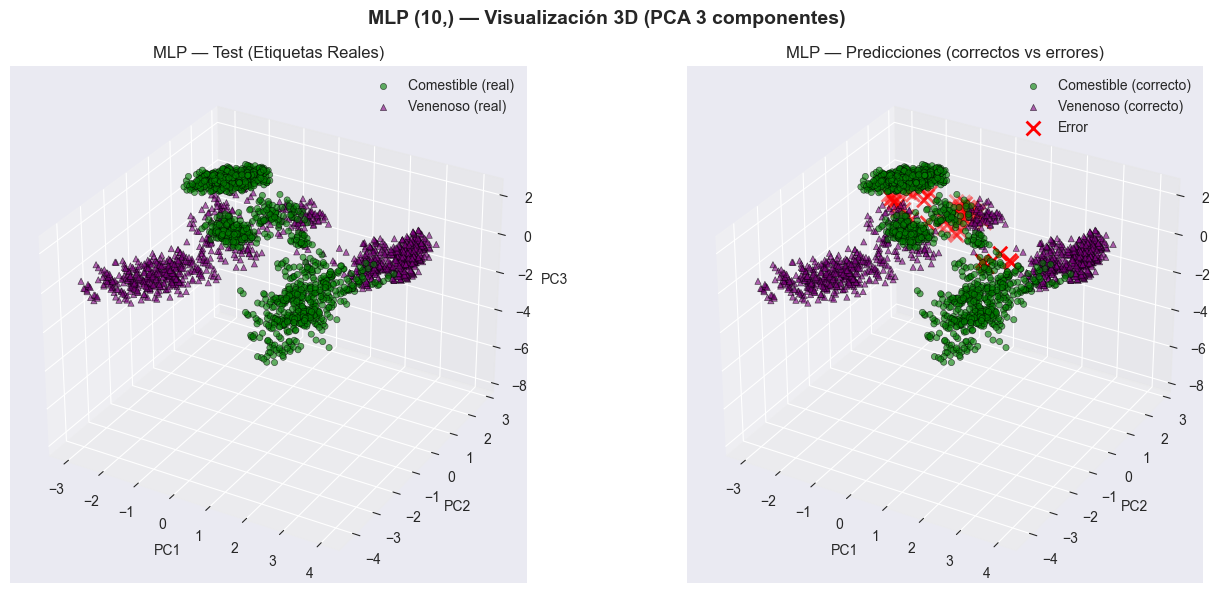


📊 Errores en visualización 3D: 65 de 2437 (2.67%)
   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA (22D → 3D)


In [26]:
# Visualización 3D de las predicciones de MLP (PCA 3 componentes)
from mpl_toolkits.mplot3d import Axes3D

print('='*80)
print('VISUALIZACIÓN 3D - Predicciones MLP (PCA)')
print('='*80)

pca_3d_mlp = PCA(n_components=3)
Xtrain_mlp_3d = pca_3d_mlp.fit_transform(Xtrain_mlp)
Xtest_mlp_3d = pca_3d_mlp.transform(Xtest_mlp)

# Entrenar MLP en 3D para visualización
mlp_3d = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_final,
    activation='relu',
    max_iter=350,
    random_state=1,
    solver='adam'
)
mlp_3d.fit(Xtrain_mlp_3d, Ytrain.ravel())
Y_test_pred_mlp_3d = mlp_3d.predict(Xtest_mlp_3d)

fig = plt.figure(figsize=(14,6))

# Subplot 1: Etiquetas reales
ax = fig.add_subplot(121, projection='3d')
ax.scatter(Xtest_mlp_3d[Ytest.flatten()==0,0], Xtest_mlp_3d[Ytest.flatten()==0,1], Xtest_mlp_3d[Ytest.flatten()==0,2],
           c='green', marker='o', label='Comestible (real)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)
ax.scatter(Xtest_mlp_3d[Ytest.flatten()==1,0], Xtest_mlp_3d[Ytest.flatten()==1,1], Xtest_mlp_3d[Ytest.flatten()==1,2],
           c='purple', marker='^', label='Venenoso (real)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)
ax.set_title('MLP — Test (Etiquetas Reales)')
ax.set_xlabel('PC1'); ax.set_ylabel('PC2'); ax.set_zlabel('PC3')
ax.legend()

# Subplot 2: Predicciones (correctos vs errores)
ax2 = fig.add_subplot(122, projection='3d')
correct_mask_mlp_3d = (Y_test_pred_mlp_3d.flatten() == Ytest.flatten())

ax2.scatter(Xtest_mlp_3d[correct_mask_mlp_3d & (Y_test_pred_mlp_3d.flatten()==0),0],
            Xtest_mlp_3d[correct_mask_mlp_3d & (Y_test_pred_mlp_3d.flatten()==0),1],
            Xtest_mlp_3d[correct_mask_mlp_3d & (Y_test_pred_mlp_3d.flatten()==0),2],
            c='green', marker='o', label='Comestible (correcto)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)
ax2.scatter(Xtest_mlp_3d[correct_mask_mlp_3d & (Y_test_pred_mlp_3d.flatten()==1),0],
            Xtest_mlp_3d[correct_mask_mlp_3d & (Y_test_pred_mlp_3d.flatten()==1),1],
            Xtest_mlp_3d[correct_mask_mlp_3d & (Y_test_pred_mlp_3d.flatten()==1),2],
            c='purple', marker='^', label='Venenoso (correcto)', alpha=0.6, s=20, edgecolors='k', linewidths=0.5)

# Errores
err_mask_mlp_3d = ~correct_mask_mlp_3d
if err_mask_mlp_3d.sum() > 0:
    ax2.scatter(Xtest_mlp_3d[err_mask_mlp_3d,0], Xtest_mlp_3d[err_mask_mlp_3d,1], Xtest_mlp_3d[err_mask_mlp_3d,2],
                c='red', marker='x', s=100, label='Error', linewidths=2)

ax2.set_title('MLP — Predicciones (correctos vs errores)')
ax2.set_xlabel('PC1'); ax2.set_ylabel('PC2'); ax2.set_zlabel('PC3')
ax2.legend()

plt.suptitle(f'MLP {hidden_layer_sizes_final} — Visualización 3D (PCA 3 componentes)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

num_errores_mlp_3d = err_mask_mlp_3d.sum()
print(f'\n📊 Errores en visualización 3D: {num_errores_mlp_3d} de {len(Ytest)} ({num_errores_mlp_3d/len(Ytest)*100:.2f}%)')
if num_errores_mlp_3d > 0:
    print('   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA (22D → 3D)')

# Guardamos en mlp_results para referencia
mlp_results['y_pred_2d'] = Y_test_pred_mlp_2d
mlp_results['y_pred_3d'] = Y_test_pred_mlp_3d
mlp_results['pca_2d'] = pca_2d_mlp
mlp_results['pca_3d'] = pca_3d_mlp


VISUALIZACIÓN 2D - Frontera de Decisión MLP (PCA)


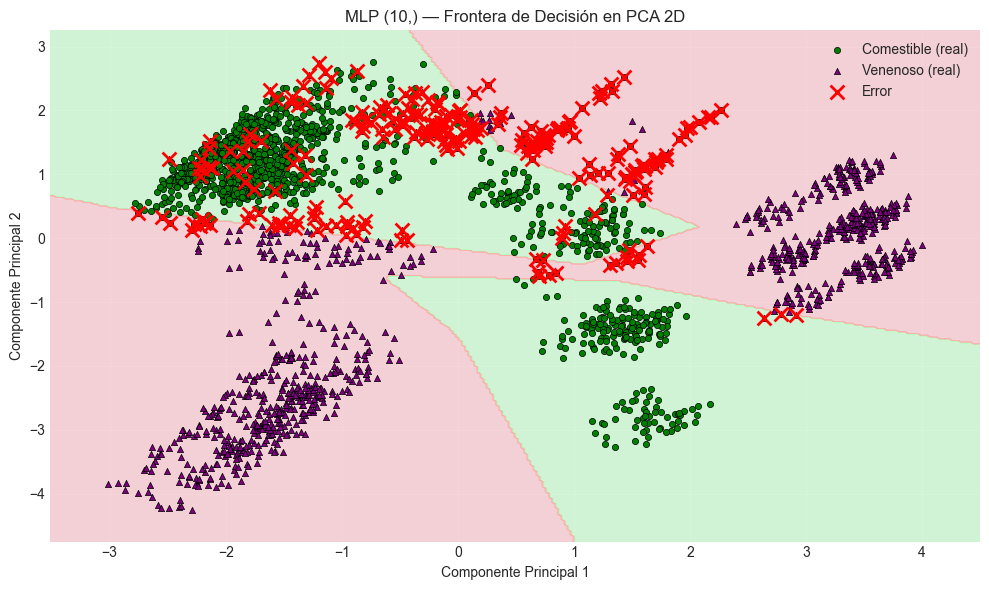


📊 Errores en visualización 2D: 245 de 2437 (10.05%)
   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA


In [25]:
# Visualización 2D de la frontera de decisión MLP (PCA 2 componentes)
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

print('='*80)
print('VISUALIZACIÓN 2D - Frontera de Decisión MLP (PCA)')
print('='*80)

# Reducir a 2D con PCA (sobre datos escalados)
pca_2d_mlp = PCA(n_components=2)
Xtrain_mlp_2d = pca_2d_mlp.fit_transform(Xtrain_mlp)
Xtest_mlp_2d = pca_2d_mlp.transform(Xtest_mlp)

# Entrenar MLP en el espacio 2D (usando la mejor arquitectura encontrada)
mlp_2d = MLPClassifier(
    hidden_layer_sizes=hidden_layer_sizes_final,
    activation='relu',
    max_iter=350,
    random_state=1,
    solver='adam'
)
mlp_2d.fit(Xtrain_mlp_2d, Ytrain.ravel())
Y_test_pred_mlp_2d = mlp_2d.predict(Xtest_mlp_2d)

# Malla para la frontera
x_min, x_max = Xtest_mlp_2d[:, 0].min() - 0.5, Xtest_mlp_2d[:, 0].max() + 0.5
y_min, y_max = Xtest_mlp_2d[:, 1].min() - 0.5, Xtest_mlp_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Predecir para cada punto de la malla
Z = mlp_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 6))
cm_light = ListedColormap(['#AAFFAA', '#FFAAAA'])
plt.contourf(xx, yy, Z, cmap=cm_light, alpha=0.4)

# Puntos de test
plt.scatter(Xtest_mlp_2d[Ytest.flatten()==0, 0], Xtest_mlp_2d[Ytest.flatten()==0, 1], 
            c='green', marker='o', label='Comestible (real)', s=20, edgecolors='k', linewidths=0.5)
plt.scatter(Xtest_mlp_2d[Ytest.flatten()==1, 0], Xtest_mlp_2d[Ytest.flatten()==1, 1], 
            c='purple', marker='^', label='Venenoso (real)', s=20, edgecolors='k', linewidths=0.5)

# Marcamos errores
errors_mask_mlp = (Y_test_pred_mlp_2d.flatten() != Ytest.flatten())
if errors_mask_mlp.sum() > 0:
    plt.scatter(Xtest_mlp_2d[errors_mask_mlp, 0], Xtest_mlp_2d[errors_mask_mlp, 1], 
                c='red', marker='x', s=100, label='Error', linewidths=2)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title(f'MLP {hidden_layer_sizes_final} — Frontera de Decisión en PCA 2D')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

num_errores_mlp_2d = errors_mask_mlp.sum()
print(f'\n📊 Errores en visualización 2D: {num_errores_mlp_2d} de {len(Ytest)} ({num_errores_mlp_2d/len(Ytest)*100:.2f}%)')
if num_errores_mlp_2d > 0:
    print('   Nota: Errores esperados debido a la reducción de dimensionalidad con PCA')
